<a href="https://colab.research.google.com/github/Nahomie07/students/blob/main/TP3_INF4127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **TP3 INF4127**
---
## **Membres du groupe** :

- **NONO NGANSOP NAHOMIE MADELEINE** | 20U2670
- **DENEBEYE HARLETTE** | 20V2636
- **KAMGA MAWABO INES MANUELLA** | 0000
- **DEMGNE BOUYIM MURIELLE** | 19M2124


##**Importation des bibliotheques necessaires**

In [ ]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## **Definition de la fonction de descente de gradient avec differentes methodes**

---

In [ ]:
def calculer_pas_optimal(x,f, gradient, beta=0.5, c=0.1):
    pas = 1.0  # Pas initial
    while f(x - pas * gradient) > f(x) - c * pas * np.dot(gradient, gradient):
        pas = beta * pas  # Réduire le pas

    return pas

In [ ]:
def descente_gradient(methode, f, grad, x0, pas = 1, erreur_point = 1e-5, erreur_grad = 1e-5, maxIter = 1000):
  #fpas est la fonction pour calculer le pas pour la descente de gradient optimal
  # Recherche le minimum d'une fonction f avec la descente de gradient à pas fixe, pas normalisé et pas optimal
  # grad est la dérivée de f
  # x0 est le point initiales
  # maxIter est le nombre maximum d'itération
  # Récupère la dimension de x0
  dim = np.max(np.shape(x0))
  i_list = []
  f_list = []
  pas_list = []
  error_point_list = []  # Pour stocker les erreurs de point à chaque itération
  error_grad_list = []
  x = np.asarray(x0)  # Convertit x0 en un tableau numpy
  x_old = x  # Initialise x_old à x
  grad_x = grad(x)  # Calcule le gradient de x
  if dim > 1:
      evolution_X = np.zeros([dim, maxIter])
  else:
      evolution_X = []
  #norm_grad = math.sqrt(gradx ** 2 + grady ** 2)
  # norme du gradient
  for i in range(maxIter):
    # tant que la pente n'est pas approximati
    grad_x = grad(x) # on calcule la pente
    #norm_grad = math.sqrt(gradx ** 2 + grady ** 2) # norme du gradient
    i_list.append(i)
    f_list.append(f(x))
    error_grad_list.append(np.linalg.norm(grad_x))
    if dim > 1:
      evolution_X[:, i] = x
    else:
      evolution_X.append(x)
    if methode == 'PasFixe':
      pas_list.append(pas)
      x = x - pas * grad(x)
      error_point_list.append(np.linalg.norm(x - x_old))
      # on effectue un petit pas vers le bas selon x
      if (error_point_list[i] <erreur_point) or (error_grad_list[i] < erreur_grad):
              # Condition d'arrêt basée sur les erreurs spécifiées
              break
      x_old = x
    elif methode =='PasNormaliseFixe':
        # Met à jour la valeur de la variable x en utilisant la méthode de descente de gradient avec un pas h
        # Applique ce pas à la norme du gradient
        pas_list.append(pas)
        x = x - pas * grad(x) / np.linalg.norm(grad(x))
        error_point_list.append(np.linalg.norm(x - x_old))
        if (error_point_list[i] < erreur_point) or (error_grad_list[i] < erreur_grad):
            # Condition d'arrêt basée sur les erreurs spécifiées
            break
        x_old = x
    elif methode =='PasOptimal':
        #Ici on calcul le pas otimal
        pas = calculer_pas_optimal(x,f, grad_x)
        pas_list.append(pas)
        x = x - pas * grad(x)
        error_point_list.append(np.linalg.norm(x - x_old))
        # on effectue un petit pas vers le bas selon x
        if (error_point_list[i] < erreur_point) or (error_grad_list[i] < erreur_grad):
              # Condition d'arrêt basée sur les erreurs spécifiées
              break
        x_old = x
  if dim > 1:
     d = pd.DataFrame(list(zip(i_list, f_list, pas_list, evolution_X[0], evolution_X[1], error_point_list, error_grad_list)), columns=['k', 'f(x)', 's', 'x','y','||x-x_old||','||grad(x)||'])
  else:
    d = pd.DataFrame(list(zip(i_list, f_list, pas_list, evolution_X, error_point_list, error_grad_list)), columns=['k', 'f(x)', 's', 'x','||x-x_old||','||grad(x)||'])
  print(d[i-19:])
  print('Les paramètres finaux sont:\n')
  print("point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i], i + 1, f(x)))
  return x, evolution_X, i

## Fonction pour la visualisation des courbe de niveau et de la trajectoire de descente de gradient du fonction

In [ ]:
# fonction de visualisation pour les fonction ayant x et y
def vg(f, evolution_X, min, initial, methode):
  x = np.linspace(-6, 7, 100)
  y = np.linspace(-6, 5, 100)
  X, Y = np.meshgrid(x, y)
  Z = f([X, Y])

  fig = plt.figure(figsize = (20, 10))
  contours = plt.contour(X, Y, Z, 45)
  plt.clabel(contours, inline = True, fontsize = 10)
  plt.scatter(min[0], min[1], color='green', label="Minimum global")
  plt.scatter(initial[0],initial[1], color='red', label="Point de départ")
  plt.title("Evolution de la fonction lors de la descente de gradient avec des cercles de niveau", fontsize=15)
  plt.plot(evolution_X[0], evolution_X[1], 'o-', label = methode)
  plt.show()

## Les 3 points initiaux pour les descentes

In [ ]:
x01 = [-2.0]
x02 = [0.5]
x03 = [3.0]
# Pour les fonction dont x a deux dimention
x1 = [-2.0, 0.5]
x2 = [0.5, 3.0]
x3 = [3.0, -5.0]

## **REPRESENTATION DES FONCTIONS**

### $f(x)=x^2 + sin(x)$

In [ ]:
valeurs_x = np.linspace(-10, 10, 400)

Text(0.5, 1.0, 'Fonction 1: $f(x) = x^2 + \\sin(x)$')

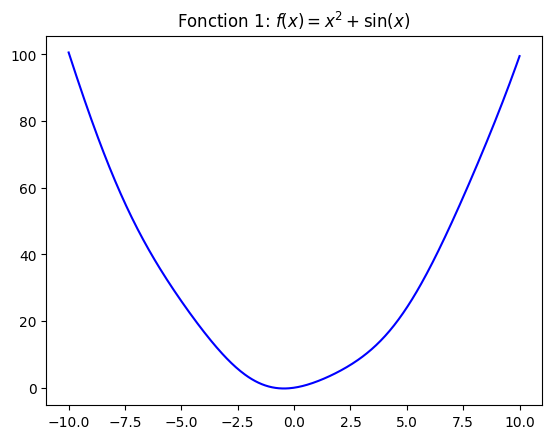

In [ ]:
# Fonction 1: f(x) = x^2 + sin(x)
def f1(x):
    return x**2 + np.sin(x)
#Le gradient de la fonction f1
def grad1(x):
    return 2*x + np.cos(x)
#fonction à minimisée pour le calcul du pas optimal pour la fonction f1
def f1pas(sx):
  return f1(sx[1]-sx[1]*grad1(sx[0]))
def grad1pas(sx):
  return grad1(sx[0])*grad1(f1pas(sx))

plt.plot(valeurs_x, f1(valeurs_x), label='Fonction 1', color='blue')
plt.title('Fonction 1: $f(x) = x^2 + \sin(x)$')

### Descente du gradient a pas fixe

#### Pour la première origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode pas fixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f1, grad1, x01, pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min)[0])
print("Nombre d'itérations :", iterations)

     k                    f(x)    s                       x  ||x-x_old||  \
18  18  [-0.23239175205925344]  0.1   [-0.4579665208934781]     0.001898   
19  19  [-0.23242337715558953]  0.1   [-0.4560685570646486]     0.001435   
20  20  [-0.23244144755751225]  0.1     [-0.45463393814015]     0.001085   
21  21  [-0.23245177674630912]  0.1   [-0.4535493343504029]     0.000820   
22  22  [-0.23245768266530933]  0.1   [-0.4527292270477181]     0.000620   
23  23  [-0.23246106021456991]  0.1   [-0.4521090446938441]     0.000469   
24  24  [-0.23246299212147017]  0.1  [-0.45164000962068757]     0.000355   
25  25  [-0.23246409727819206]  0.1   [-0.4512852621042142]     0.000268   
26  26   [-0.2324647295470164]  0.1  [-0.45101694108990864]     0.000203   
27  27   [-0.2324650912983108]  0.1   [-0.4508139831216575]     0.000154   
28  28  [-0.23246529828453197]  0.1  [-0.45066046144578287]     0.000116   
29  29  [-0.23246541672229307]  0.1   [-0.4505443319582598]     0.000088   
30  30  [-0.

### Illustration

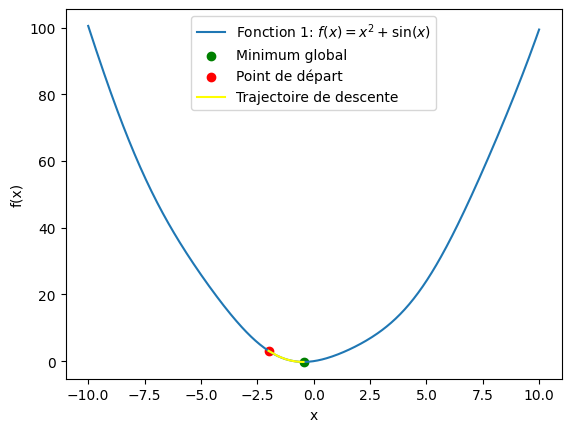

In [ ]:
min = x_min[0]
initial=x01[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min, f1(min), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f1(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Pour la deuxieme origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode pas fixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f1, grad1,x02,  pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min)[0])
print("Nombre d'itérations :", iterations)

     k                    f(x)    s                       x  ||x-x_old||  \
18  18  [-0.23238425499549817]  0.1   [-0.4420070232228566]     0.001988   
19  19  [-0.23241898106480927]  0.1   [-0.4439951156945247]     0.001505   
20  20  [-0.23243888601857057]  0.1   [-0.4455003695522926]     0.001139   
21  21   [-0.2324502910284104]  0.1  [-0.44663981208134407]     0.000862   
22  22  [-0.23245682384894467]  0.1  [-0.44750220787782086]     0.000653   
23  23   [-0.2324605650225781]  0.1   [-0.4481548408802306]     0.000494   
24  24     [-0.23246270712836]  0.1    [-0.448648687672501]     0.000374   
25  25  [-0.23246393348817093]  0.1  [-0.44902235557137404]     0.000283   
26  26  [-0.23246463551304547]  0.1   [-0.4493050758168481]     0.000214   
27  27  [-0.23246503735475285]  0.1  [-0.44951897595098467]     0.000162   
28  28  [-0.23246526735762035]  0.1  [-0.44968080346603007]     0.000122   
29  29  [-0.23246539899921376]  0.1   [-0.4498032323697776]     0.000093   
30  30  [-0.

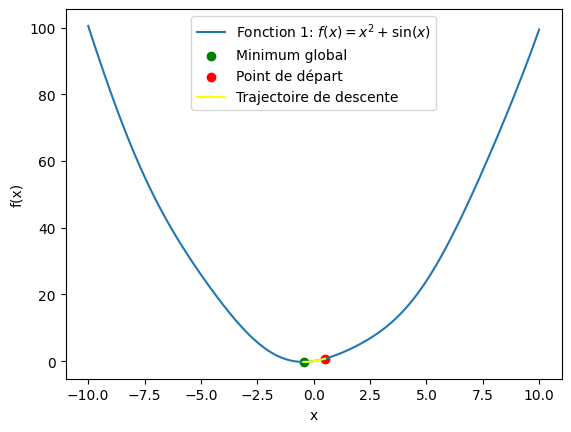

In [ ]:
min = x_min[0]
initial=x02[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min, f1(min), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f1(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Pour la troisieme origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode pas fixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f1, grad1, x03, pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min)[0])
print("Nombre d'itérations :", iterations)

     k                    f(x)    s                       x  ||x-x_old||  \
26  26   [-0.2324061835869739]  0.1   [-0.4431964062529154]     0.001699   
27  27  [-0.23243155155478012]  0.1   [-0.4448956818066367]     0.001286   
28  28  [-0.23244608902621966]  0.1  [-0.44618210195263025]     0.000974   
29  29  [-0.23245441712605547]  0.1  [-0.44715580053966375]     0.000737   
30  30  [-0.23245918684063593]  0.1  [-0.44789269916717067]     0.000558   
31  31  [-0.23246191805128638]  0.1  [-0.44845032989293837]     0.000422   
32  32  [-0.23246348175585987]  0.1   [-0.4488722713110726]     0.000319   
33  33  [-0.23246437692752872]  0.1   [-0.4491915223267154]     0.000242   
34  34  [-0.23246488934239773]  0.1   [-0.4494330646568696]     0.000183   
35  35   [-0.2324651826408094]  0.1  [-0.44961580722198485]     0.000138   
36  36   [-0.2324653505123071]  0.1  [-0.44975406042864985]     0.000105   
37  37  [-0.23246544659132026]  0.1   [-0.4498586533785464]     0.000079   
38  38  [-0.

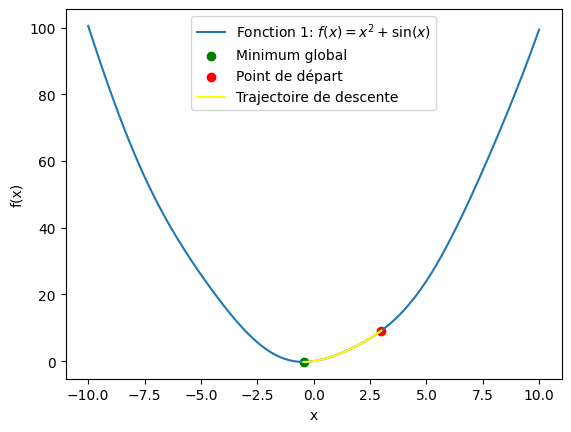

In [ ]:
min = x_min[0]
initial=x03[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min, f1(min), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f1(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### Descente du gradien a pas normalise

#### Pour la première origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas Normalise
x_min_n, evolution_X_n, iterations_n = descente_gradient('PasNormaliseFixe',f1, grad1, x01,  pas=0.1)
# Affichage des résultats
print("Minimum atteint à x =", x_min_n[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min_n)[0])
print("Nombre d'itérations :", iterations_n)

       k                    f(x)    s                       x  ||x-x_old||  \
980  980  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
981  981  [-0.22942553860420306]  0.1  [-0.49999999999999933]          0.1   
982  982  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
983  983  [-0.22942553860420306]  0.1  [-0.49999999999999933]          0.1   
984  984  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
985  985  [-0.22942553860420306]  0.1  [-0.49999999999999933]          0.1   
986  986  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
987  987  [-0.22942553860420306]  0.1  [-0.49999999999999933]          0.1   
988  988  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
989  989  [-0.22942553860420306]  0.1  [-0.49999999999999933]          0.1   
990  990  [-0.22941834230865044]  0.1  [-0.39999999999999936]          0.1   
991  991  [-0.22942553860420306]  0.1  [-0.49999999999999933]   

### Illustration

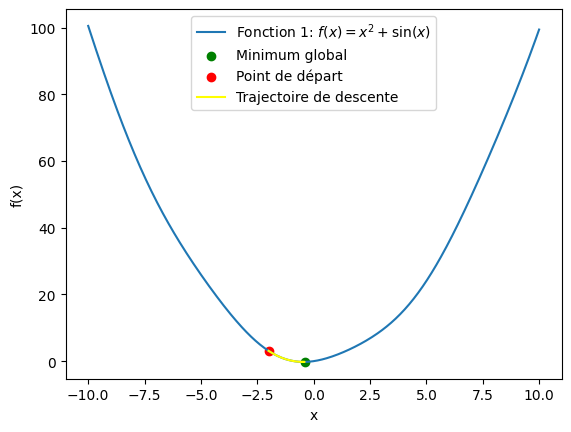

In [ ]:
min_n = x_min_n
initial=x01[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_n, f1(min_n), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X_n, [f1(x) for x in evolution_X_n], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Pour la deuxieme origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas Normalise
x_min_n, evolution_X_n, iterations_n = descente_gradient('PasNormaliseFixe', f1, grad1, x02, pas=0.1)
# Affichage des résultats
print("Minimum atteint à x =", x_min_n[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min_n)[0])
print("Nombre d'itérations :", iterations_n)

       k                   f(x)    s       x  ||x-x_old||  ||grad(x)||
980  980   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
981  981  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
982  982   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
983  983  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
984  984   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
985  985  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
986  986   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
987  987  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
988  988   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
989  989  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
990  990   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
991  991  [-0.2294183423086505]  0.1  [-0.4]          0.1     0.121061
992  992   [-0.229425538604203]  0.1  [-0.5]          0.1     0.122417
993  9

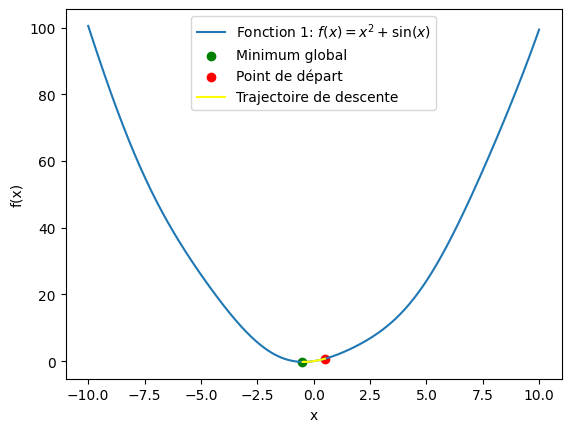

In [ ]:
min_n = x_min_n
initial=x02[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_n, f1(min_n), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X_n, [f1(x) for x in evolution_X_n], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Pour la troisieme origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas Normalise
x_min_n, evolution_X_n, iterations_n = descente_gradient('PasNormaliseFixe', f1, grad1, x03, pas=0.1)
# Affichage des résultats
print("Minimum atteint à x =", x_min_n[0])
print("Valeur minimale de la fonction f(x) =", f1(x_min_n)[0])
print("Nombre d'itérations :", iterations_n)

       k                    f(x)    s                      x  ||x-x_old||  \
980  980   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
981  981  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   
982  982   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
983  983  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   
984  984   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
985  985  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   
986  986   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
987  987  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   
988  988   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
989  989  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   
990  990   [-0.2294183423086507]  0.1  [-0.4000000000000016]          0.1   
991  991  [-0.22942553860420278]  0.1  [-0.5000000000000016]          0.1   

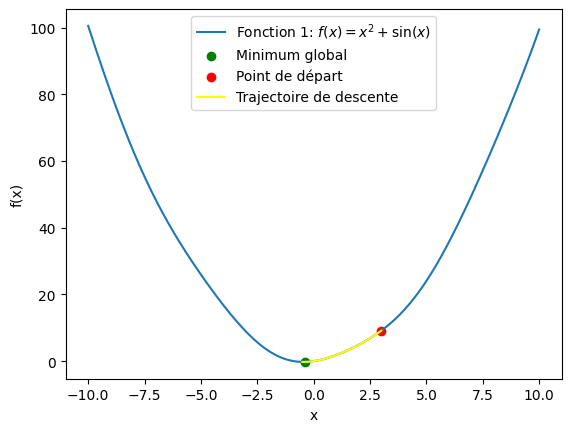

In [ ]:
min_n = x_min_n
initial=x03[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_n, f1(min_n), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_X_n, [f1(x) for x in evolution_X_n], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### Descente de gradient a pas optimal

#### Premiere origine

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas normalise
x_minp, evolution_Xp, iterationsp = descente_gradient('PasOptimal', f1, grad1, x01)

# Affichage des résultats
print("Minimum atteint à x =", x_minp[0])
print("Valeur minimale de la fonction f(x) =", f1(x_minp)[0])
print("Nombre d'itérations :", iterationsp)

   k                    f(x)    s                       x  ||x-x_old||  \
0  0     [3.090702573174318]  0.5                  [-2.0]     2.208073   
1  1    [0.2498698050436227]  0.5   [0.20807341827357106]     0.697289   
2  2  [-0.23060176152228648]  0.5  [-0.48921535721147025]     0.047864   
3  3   [-0.2323706887763636]  0.5   [-0.4413509300855348]     0.010737   
4  4  [-0.23246115971936981]  0.5   [-0.4520877116828866]     0.002319   
5  5   [-0.2324653653906027]  0.5  [-0.44976852903421816]     0.000505   
6  6  [-0.23246556523683412]  0.5  [-0.45027388006079966]     0.000110   
7  7  [-0.23246557468850854]  0.5   [-0.4501639700979201]     0.000024   
8  8    [-0.232465575135983]  0.5  [-0.45018788445348956]     0.000005   

   ||grad(x)||  
0     4.416147  
1     1.394578  
2     0.095729  
3     0.021474  
4     0.004638  
5     0.001011  
6     0.000220  
7     0.000048  
8     0.000010  
Les paramètres finaux sont:

point error=5.202854315822236e-06, grad error=1.040570863164

### ILLUSTRATION

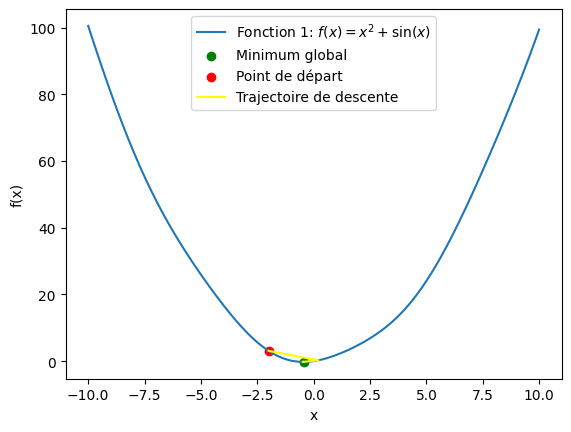

In [ ]:
min_p = x_minp[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_p, f1(min_p), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_Xp, [f1(x) for x in evolution_Xp], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas optimal
x_minp, evolution_Xp, iterationsp = descente_gradient('PasOptimal', f1, grad1, x02)

# Affichage des résultats
print("Minimum atteint à x =", x_minp[0])
print("Valeur minimale de la fonction f(x) =", f1(x_minp)[0])
print("Nombre d'itérations :", iterationsp)

   k                    f(x)    s                       x  ||x-x_old||  \
0  0     [0.729425538604203]  0.5                   [0.5]     0.938791   
1  1   [-0.2323077753744487]  0.5   [-0.4387912809451864]     0.013842   
2  2  [-0.23245826863125238]  0.5   [-0.4526329216602096]     0.002984   
3  3  [-0.23246522767925254]  0.5  [-0.44964937621365964]     0.000650   
4  4  [-0.23246555872725888]  0.5   [-0.4502997781314499]     0.000141   
5  5  [-0.23246557438028756]  0.5   [-0.4501583343696809]     0.000031   
6  6   [-0.2324655751213944]  0.5  [-0.45018911053614313]     0.000007   

   ||grad(x)||  
0     1.877583  
1     0.027683  
2     0.005967  
3     0.001301  
4     0.000283  
5     0.000062  
6     0.000013  
Les paramètres finaux sont:

point error=6.695692865543723e-06, grad error=1.3391385731087446e-05, iteration=7, f(x)=[-0.23246558]
Minimum atteint à x = -0.4501824148432776
Valeur minimale de la fonction f(x) = -0.2324655751564727
Nombre d'itérations : 6


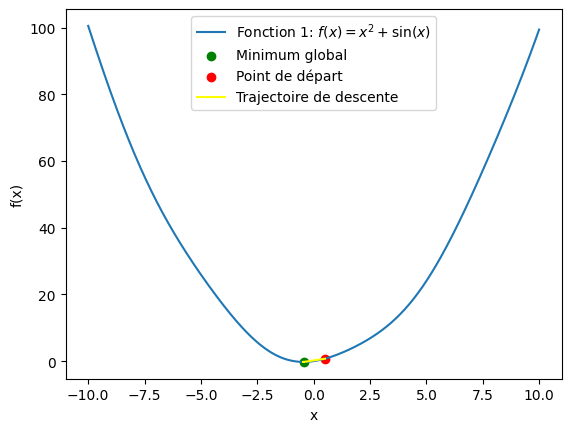

In [ ]:
min_p = x_minp[0]
initial=np.asarray(x02)
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_p, f1(min_p), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_Xp, [f1(x) for x in evolution_Xp], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas optimal
x_minp, evolution_Xp, iterationsp = descente_gradient('PasOptimal', f1, grad1, x03)

# Affichage des résultats
print("Minimum atteint à x =", x_minp[0])
print("Valeur minimale de la fonction f(x) =", f1(x_minp)[0])
print("Nombre d'itérations :", iterationsp)

   k                    f(x)    s                       x  ||x-x_old||  \
0  0     [9.141120008059866]  1.0                   [3.0]     5.010008   
1  1     [3.135042791009735]  0.5    [-2.010007503399555]     2.222620   
2  2   [0.25621881768606736]  0.5   [0.21261282167115603]     0.701354   
3  3  [-0.23064685037769117]  0.5  [-0.48874145418651493]     0.047279   
4  4  [-0.23237306378997083]  0.5   [-0.4414622319575237]     0.010602   
5  5  [-0.23246126930654773]  0.5  [-0.45206393695471914]     0.002290   
6  6  [-0.23246537060615144]  0.5    [-0.449773721836234]     0.000499   
7  7   [-0.2324655654834175]  0.5   [-0.4502727512509689]     0.000109   
8  8  [-0.23246557470018345]  0.5      [-0.4501642157335]     0.000024   
9  9  [-0.23246557513653565]  0.5   [-0.4501878310138375]     0.000005   

   ||grad(x)||  
0     5.010008  
1     4.445241  
2     1.402709  
3     0.094558  
4     0.021203  
5     0.004580  
6     0.000998  
7     0.000217  
8     0.000047  
9     0.000010 

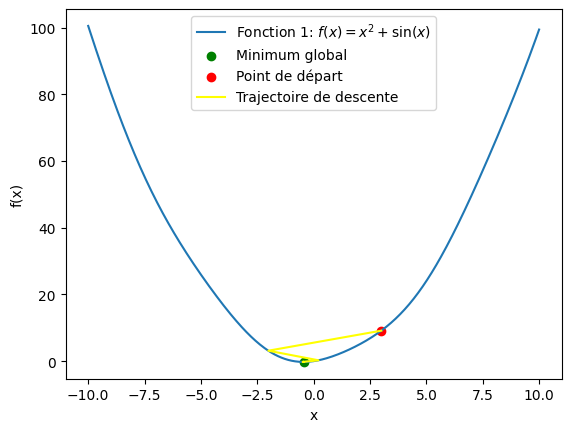

In [ ]:
min_p = x_minp[0]
initial=np.asarray(x03)
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 1: $f(x) = x^2 + \sin(x)$")
plt.scatter(min_p, f1(min_p), color='green', label="Minimum global")
plt.scatter(initial, f1(initial), color='red', label="Point de départ")
plt.plot(evolution_Xp, [f1(x) for x in evolution_Xp], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### $f2(x)=  \frac{x^4}{4}-$ $\frac{x^3}{3}-x^2+1$




Text(0.5, 1.0, 'Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$')

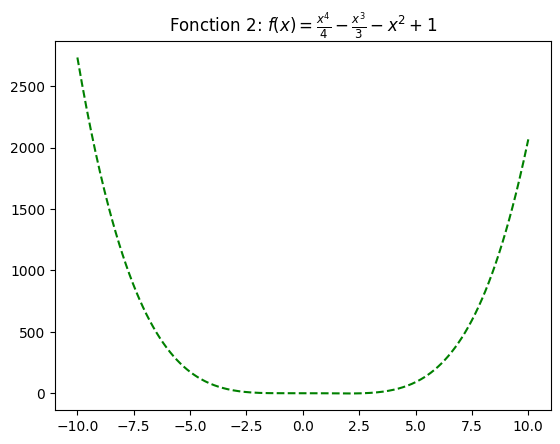

In [ ]:
# Fonction 2: f(x) = (x^4 / 4) - (x^3 / 3) - x^2 + 1
def f2(x):
    return (x**4 / 4) - (x**3 / 3) - x**2 + 1
#Le gradient de la fonction f2
def grad2(x):
    return x**3 - x**2 - 2*x


plt.plot(valeurs_x, f2(valeurs_x), label='Fonction 2', color='green', linestyle='dashed')
plt.title('Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$')

### Pas fixe

#### Origine 1

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min2, evolution_X2, iterations2 = descente_gradient('PasFixe', f2, grad2, x01 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min2[0])
print("Valeur minimale de la fonction f(x) =", f2(x_min2)[0])
print("Nombre d'itérations :", iterations2)

     k                  f(x)    s                      x  ||x-x_old||  \
6    6  [0.5842776509257575]  0.1   [-1.024817238615576]     0.007693   
7    7  [0.5837799064331598]  0.1  [-1.0171241804157594]     0.005255   
8    8  [0.5835468820715883]  0.1  [-1.0118691291237876]     0.003617   
9    9  [0.5834362237942641]  0.1  [-1.0082518726883767]     0.002503   
10  10  [0.5833831637560662]  0.1  [-1.0057490173309085]     0.001738   
11  11  [0.5833575524977006]  0.1  [-1.0040110726503353]     0.001210   
12  12  [0.5833451336566302]  0.1  [-1.0028013089204162]     0.000844   
13  13  [0.5833390926673294]  0.1  [-1.0019577751133442]     0.000589   
14  14  [0.5833361476209382]  0.1  [-1.0013689086755908]     0.000411   
15  15   [0.583334709673833]  0.1  [-1.0009574862520074]     0.000288   
16  16  [0.5833340068300872]  0.1  [-1.0006698735766557]     0.000201   
17  17   [0.583333663035164]  0.1  [-1.0004687319813563]     0.000141   
18  18  [0.5833334947804985]  0.1  [-1.000328024492

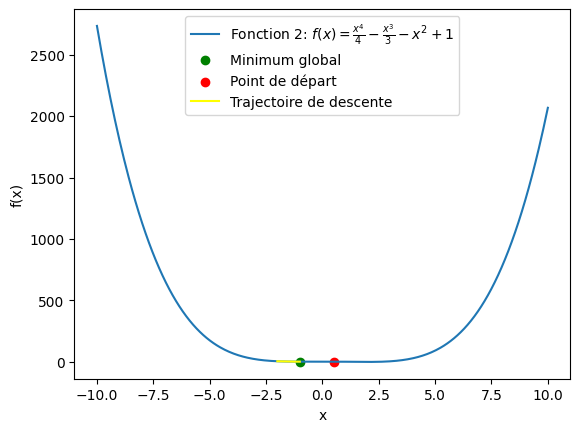

In [ ]:
min_p = x_min2[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f2(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$")
plt.scatter(min_p, f2(min_p), color='green', label="Minimum global")
plt.scatter(initial, f2(initial), color='red', label="Point de départ")
plt.plot(evolution_X2, [f2(x) for x in evolution_X2], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Origine 2

In [ ]:

# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min2, evolution_X2, iterations2 = descente_gradient('PasFixe', f2, grad2, x02 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min2[0])
print("Valeur minimale de la fonction f(x) =", f2(x_min2)[0])
print("Nombre d'itérations :", iterations2)

     k                   f(x)    s                     x  ||x-x_old||  \
0    0   [0.7239583333333333]  0.1                 [0.5]     0.112500   
1    1   [0.5834349019368489]  0.1              [0.6125]     0.137037   
2    2  [0.37673547793950757]  0.1     [0.7495373046875]     0.163979   
3    3   [0.0854778367240987]  0.1  [0.9135159144111461]     0.189920   
4    4   [-0.294789052289097]  0.1  [1.1034362921866236]     0.208093   
5    5  [-0.7324067291795835]  0.1  [1.3115294409197336]     0.208719   
6    6  [-1.1469731105617913]  0.1  [1.5202488548156474]     0.183812   
7    7  [-1.4452065663021116]  0.1   [1.704060969344747]     0.136365   
8    8  [-1.5968854842628968]  0.1  [1.8404262641683506]     0.083419   
9    9   [-1.649995597476419]  0.1  [1.9238449520888024]     0.042837   
10  10  [-1.6633978028938095]  0.1  [1.9666823519898444]     0.019439   
11  11  [-1.6660932831597406]  0.1   [1.986121606439196]     0.008231   
12  12  [-1.6665712873888938]  0.1  [1.994352604983

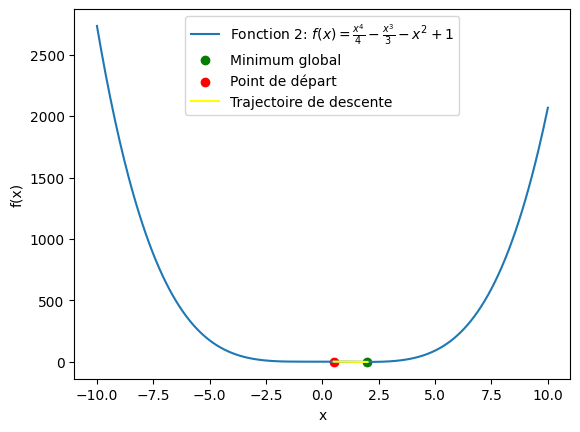

In [ ]:
min_p = x_min2[0]
initial=np.asarray(x02)
x_vals = np.linspace(-10, 10, 400)
y_vals = f2(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$")
plt.scatter(min_p, f2(min_p), color='green', label="Minimum global")
plt.scatter(initial, f2(initial), color='red', label="Point de départ")
plt.plot(evolution_X2, [f2(x) for x in evolution_X2], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Origine 3

In [ ]:


# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min2, evolution_X2, iterations2 = descente_gradient('PasFixe', f2, grad2, x03 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min2[0])
print("Valeur minimale de la fonction f(x) =", f2(x_min2)[0])
print("Nombre d'itérations :", iterations2)

     k                   f(x)    s                     x  ||x-x_old||  \
6    6   [-1.666637793344547]  0.1  [1.9968949937473308]     0.001858   
7    7  [-1.6666620062158581]  0.1  [1.9987531799605742]     0.000747   
8    8  [-1.6666659183583254]  0.1    [1.99950049489795]     0.000300   
9    9  [-1.6666665467678317]  0.1  [1.9998000732189696]     0.000120   
10  10  [-1.6666666474719847]  0.1   [1.999920009303028]     0.000048   
11  11  [-1.6666666635948215]  0.1  [1.9999680005220066]     0.000019   
12  12  [-1.6666666661751268]  0.1  [1.9999871996968226]     0.000008   

    ||grad(x)||  
6      0.018582  
7      0.007473  
8      0.002996  
9      0.001199  
10     0.000480  
11     0.000192  
12     0.000077  
Les paramètres finaux sont:

point error=7.680099982643185e-06, grad error=7.680099982732003e-05, iteration=13, f(x)=[-1.66666667]
Minimum atteint à x = 1.9999948797968052
Valeur minimale de la fonction f(x) = -1.6666666665880174
Nombre d'itérations : 12


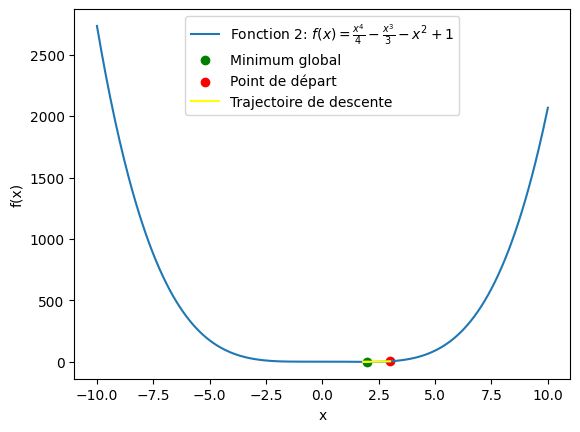

In [ ]:
min_p = x_min2[0]
initial=np.asarray(x03)
x_vals = np.linspace(-10, 10, 400)
y_vals = f2(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$")
plt.scatter(min_p, f2(min_p), color='green', label="Minimum global")
plt.scatter(initial, f2(initial), color='red', label="Point de départ")
plt.plot(evolution_X2, [f2(x) for x in evolution_X2], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### Pas Optimal

#### Origine 2

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas optimal
x_minp, evolution_Xp, iterationsp = descente_gradient('PasOptimal', f2, grad1, x02)

# Affichage des résultats
print("Minimum atteint à x =", x_minp[0])
print("Valeur minimale de la fonction f(x) =", f2(x_minp)[0])
print("Nombre d'itérations :", iterationsp)

   k                  f(x)             s      x  ||x-x_old||  ||grad(x)||
0  0  [0.7239583333333333]  1.387779e-17  [0.5]          0.0     1.877583
Les paramètres finaux sont:

point error=0.0, grad error=1.8775825618903728, iteration=1, f(x)=[0.72395833]
Minimum atteint à x = 0.5
Valeur minimale de la fonction f(x) = 0.7239583333333333
Nombre d'itérations : 0


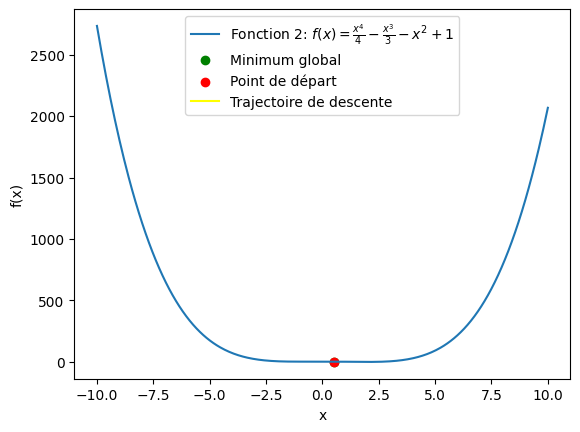

In [ ]:
min_p = x_minp[0]
initial=np.asarray(x02)
x_vals = np.linspace(-10, 10, 400)
y_vals = f2(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$")
plt.scatter(min_p, f1(min_p), color='green', label="Minimum global")
plt.scatter(initial, f2(initial), color='red', label="Point de départ")
plt.plot(evolution_Xp, [f2(x) for x in evolution_Xp], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### Pas normalisé

#### Origine 3

In [ ]:
# Appel de la fonction descente_gradient avec la méthode Pas Normalise
x_min_n, evolution_X_n, iterations_n = descente_gradient('PasNormaliseFixe', f2, grad1, x03, pas=0.1)
# Affichage des résultats
print("Minimum atteint à x =", x_min_n[0])
print("Valeur minimale de la fonction f(x) =", f2(x_min_n)[0])
print("Nombre d'itérations :", iterations_n)

       k                  f(x)    s                      x  ||x-x_old||  \
980  980  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
981  981  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
982  982  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
983  983  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
984  984  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
985  985  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
986  986  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
987  987  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
988  988  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
989  989  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
990  990  [0.8677333333333325]  0.1  [-0.4000000000000016]          0.1   
991  991  [0.8072916666666656]  0.1  [-0.5000000000000016]          0.1   
992  992  [0.867733333333

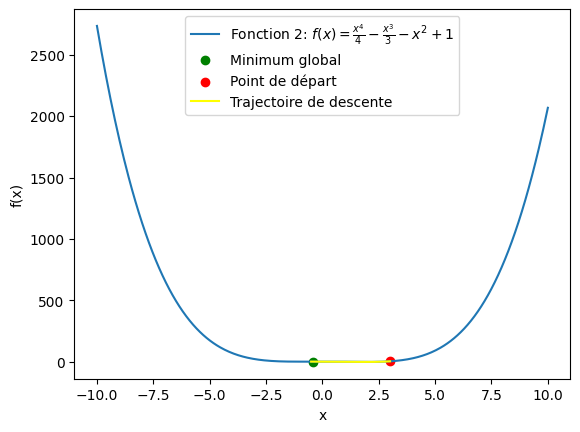

In [ ]:
min_n = x_min_n
initial=x03[0]
x_vals = np.linspace(-10, 10, 400)
y_vals = f2(x_vals)

plt.plot(x_vals, y_vals, label='Fonction 2: $f(x) = \\frac{x^4}{4} - \\frac{x^3}{3} - x^2 + 1$')
plt.scatter(min_n, f2(min_n), color='green', label="Minimum global")
plt.scatter(initial, f2(initial), color='red', label="Point de départ")
plt.plot(evolution_X_n, [f2(x) for x in evolution_X_n], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### $f3(x)=sin(x)$

Text(0.5, 1.0, 'Fonction 3: $f(x) = \\sin(x)$')

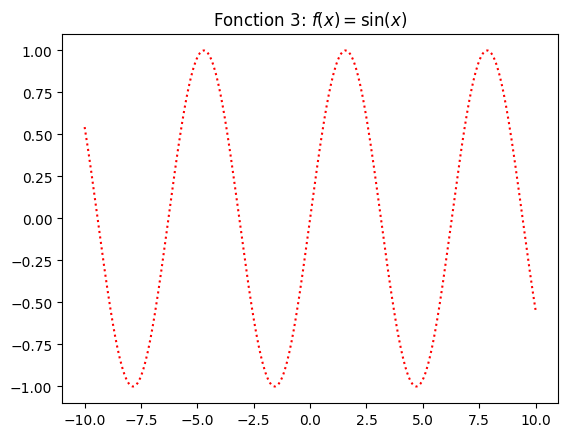

In [ ]:
# Fonction 3: f(x) = sin(x)
def f3(x):
    return np.sin(x)
#Le gradient de la fonction f3
def grad3(x):
    return np.cos(x)

plt.plot(valeurs_x, f3(valeurs_x), label='Fonction 3', color='red', linestyle='dotted')
plt.title('Fonction 3: $f(x) = \sin(x)$')

### Pas fixe

#### Origine 1

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f3, grad3, x01 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f3(x_min)[0])
print("Nombre d'itérations :", iterations)

     k                   f(x)    s                      x  ||x-x_old||  \
61  61  [-0.9999997501744023]  0.1  [-1.5715031869055545]     0.000071   
62  62  [-0.9999997976412606]  0.1  [-1.5714325009003751]     0.000064   
63  63  [-0.9999998360894176]  0.1  [-1.5713688834941184]     0.000057   
64  64   [-0.999999867232426]  0.1  [-1.5713116278273245]     0.000052   
65  65  [-0.9999998924582635]  0.1  [-1.5712600977263622]     0.000046   
66  66  [-0.9999999128911924]  0.1  [-1.5712137206348782]     0.000042   
67  67  [-0.9999999294418652]  0.1   [-1.571171981252092]     0.000038   
68  68  [-0.9999999428479104]  0.1   [-1.571134415807256]     0.000034   
69  69  [-0.9999999537068072]  0.1  [-1.5711006069066642]     0.000030   
70  70  [-0.9999999625025137]  0.1   [-1.571070178895957]     0.000027   
71  71  [-0.9999999696270359]  0.1  [-1.5710427936861933]     0.000025   
72  72   [-0.999999975397899]  0.1  [-1.5710181469973132]     0.000022   
73  73  [-0.9999999800722982]  0.1  [-

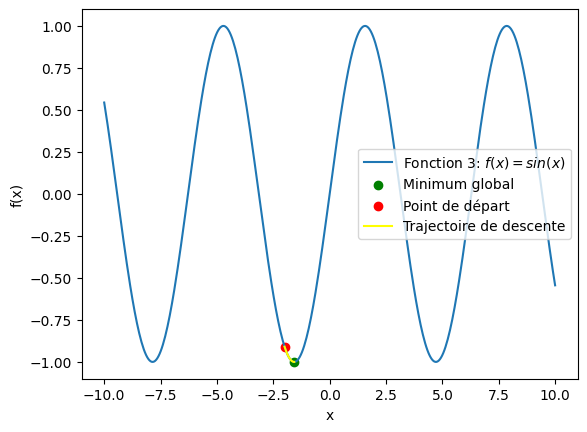

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f3(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 3: $f(x) = sin(x)$")
plt.scatter(min_p, f3(min_p), color='green', label="Minimum global")
plt.scatter(initial, f3(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f3(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### Pas normalisé

#### Origine 1

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasNormaliseFixe
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f3, grad3, x01 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f3(x_min)[0])
print("Nombre d'itérations :", iterations)

       k                   f(x)    s                      x  ||x-x_old||  \
980  980  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
981  981  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
982  982  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
983  983  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
984  984  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
985  985  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
986  986  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
987  987  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
988  988  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
989  989  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
990  990  [-0.9995736030415052]  0.1  [-1.5999999999999996]          0.1   
991  991  [-0.9974949866040544]  0.1  [-1.4999999999999996]          0.1   
992  992  [-

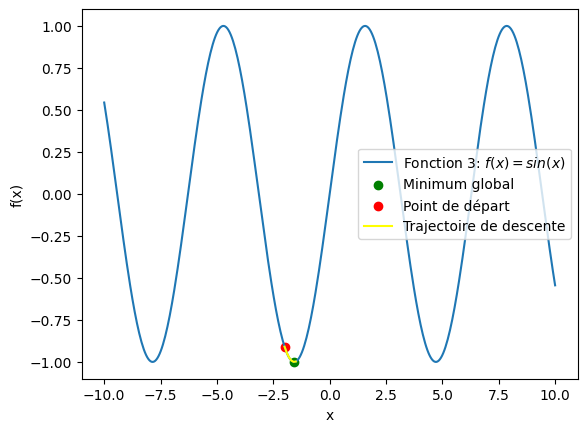

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f3(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 3: $f(x) = sin(x)$")
plt.scatter(min_p, f3(min_p), color='green', label="Minimum global")
plt.scatter(initial, f3(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f3(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f3, grad3, x01)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f3(x_min)[0])
print("Nombre d'itérations :", iterations)

       k                   f(x)  s       x  ||x-x_old||  ||grad(x)||
980  980  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
981  981  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
982  982  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
983  983  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
984  984  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
985  985  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
986  986  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
987  987  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
988  988  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
989  989  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
990  990  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
991  991  [-0.8414709848078965]  1  [-1.0]          1.0     0.540302
992  992  [-0.9092974268256817]  1  [-2.0]          1.0     0.416147
993  993  [-0.8414709848078965]  1

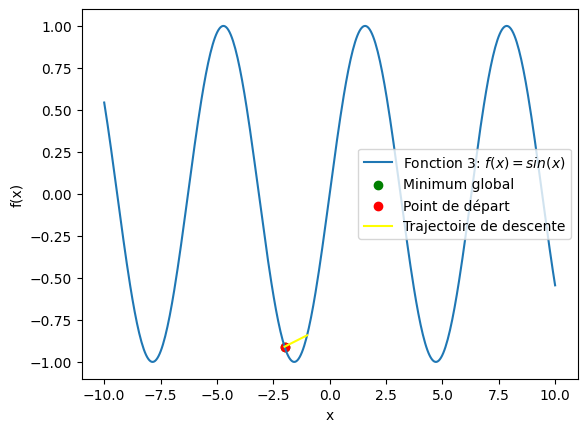

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f3(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 3: $f(x) = sin(x)$")
plt.scatter(min_p, f3(min_p), color='green', label="Minimum global")
plt.scatter(initial, f3(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f3(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### $f4(x)= \frac{1}{(1-x^2)}$

Text(0.5, 1.0, 'Fonction 4: $f(x) = \\frac{1}{1 - x^2}$')

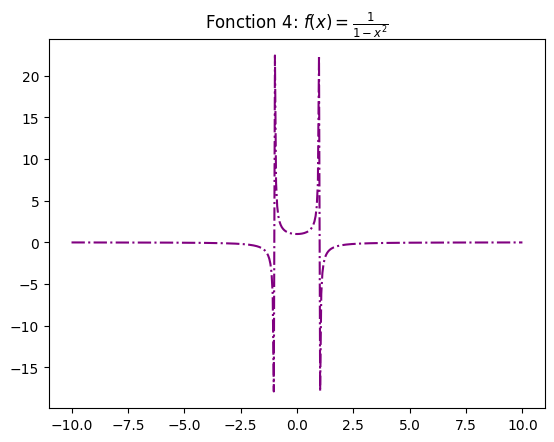

In [ ]:
# Fonction 4: f(x) = 1 / (1 - x^2)
def f4(x):
    return 1 / (1 - x**2)
#Le gradient de la fonction f4
def grad4(x):
    return 2*x / (1 - x**2)**2
valeurs_x4=np.linspace(-10, 10, 400)
plt.plot(valeurs_x4, f4(valeurs_x4), label='Fonction 4', color='purple', linestyle='dashdot')
plt.title('Fonction 4: $f(x) = \\frac{1}{1 - x^2}$')

### Pas fixe
#### Origine 1

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f4, grad4, x01 ,pas=0.9)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f4(x_min)[0])
print("Nombre d'itérations :", iterations)

       k                  f(x)    s                          x  ||x-x_old||  \
869  869   [1.000000142771376]  0.9   [-0.0003778509701135446]     0.000680   
870  870  [1.0000000913737934]  0.9   [0.00030228097029754016]     0.000544   
871  871  [1.0000000584792739]  0.9  [-0.00024182487567204873]     0.000435   
872  872  [1.0000000374267541]  0.9   [0.00019345995144791583]     0.000348   
873  873  [1.0000000239531306]  0.9  [-0.00015476798722441413]     0.000279   
874  874  [1.0000000153300066]  0.9    [0.0001238144031253715]     0.000223   
875  875  [1.0000000098112056]  0.9   [-9.905152933336949e-05]     0.000178   
876  876   [1.000000006279172]  0.9    [7.924122696522935e-05]     0.000143   
877  877  [1.0000000040186703]  0.9   [-6.339298336343298e-05]     0.000114   
878  878   [1.000000002571949]  0.9    [5.071438760786619e-05]     0.000091   
879  879  [1.0000000016460475]  0.9   [-4.057151055585832e-05]     0.000073   
880  880  [1.0000000010534704]  0.9    [3.2457208685

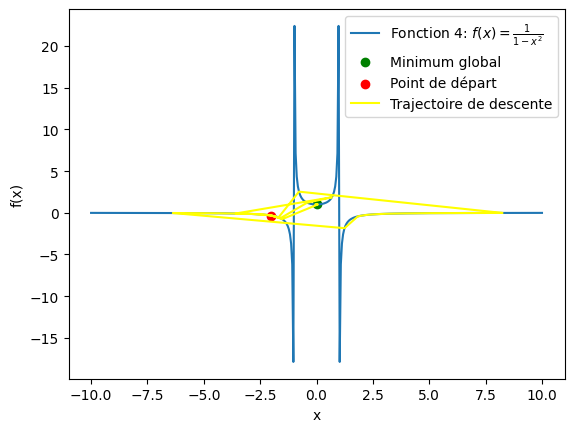

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f4(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 4: $f(x) = \\frac{1}{1 - x^2}$")
plt.scatter(min_p, f4(min_p), color='green', label="Minimum global")
plt.scatter(initial, f4(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f4(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f4, grad4, x01 ,pas=0.9)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f4(x_min)[0])
print("Nombre d'itérations :", iterations)

       k                  f(x)    s                       x  ||x-x_old||  \
980  980  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
981  981  [1.9607843137254901]  0.9                   [0.7]          0.9   
982  982  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
983  983  [1.9607843137254901]  0.9                   [0.7]          0.9   
984  984  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
985  985  [1.9607843137254901]  0.9                   [0.7]          0.9   
986  986  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
987  987  [1.9607843137254901]  0.9                   [0.7]          0.9   
988  988  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
989  989  [1.9607843137254901]  0.9                   [0.7]          0.9   
990  990  [1.0416666666666667]  0.9  [-0.20000000000000007]          0.9   
991  991  [1.9607843137254901]  0.9                   [0.7]          0.9   
992  992  [1

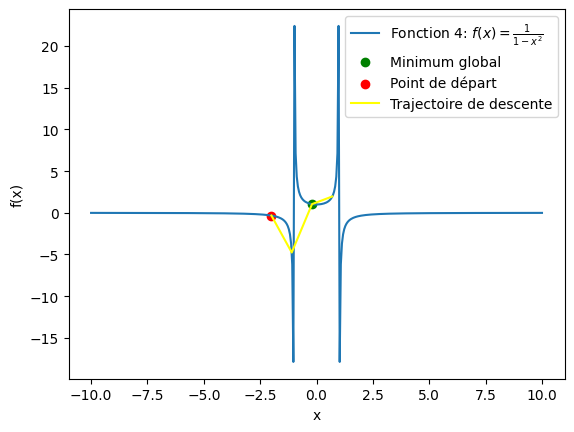

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f4(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 4: $f(x) = \\frac{1}{1 - x^2}$")
plt.scatter(min_p, f4(min_p), color='green', label="Minimum global")
plt.scatter(initial, f4(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f4(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasOptimal', f4, grad4, x01)

# Affichage des résultats
print("Minimum atteint à x =", x_min[0])
print("Valeur minimale de la fonction f(x) =", f4(x_min)[0])
print("Nombre d'itérations :", iterations)

   k                   f(x)             s                      x  ||x-x_old||  \
0  0  [-0.3333333333333333]  1.000000e+00                 [-2.0]     0.444444   
1  1  [-0.7043478260869565]  2.500000e-01  [-1.5555555555555556]     0.385860   
2  2   [-2.716008004944535]  7.812500e-03  [-1.1696954421340056]     0.134820   
3  3   [-14.09109605604779]  6.103516e-05  [-1.0348752583345202]     0.025083   
4  4   [-50.81441191881523]  9.536743e-07  [-1.0097917886001422]     0.004973   
5  5  [-103.51537591883061]  1.192093e-07  [-1.0048185908926652]     0.002567   
6  6   [-221.8222608092742]  1.490116e-08  [-1.0022515222348545]     0.001470   
7  7   [-639.3049016312395]  9.313226e-10  [-1.0007817938305141]     0.000762   
8  8  [-25105.754273237355]  1.421085e-14   [-1.000019915554646]     0.000018   
9  9  [-249871.59664399407]  1.387779e-17  [-1.0000020010257527]     0.000002   

    ||grad(x)||  
0  4.444444e-01  
1  1.543440e+00  
2  1.725698e+01  
3  4.109676e+02  
4  5.214776e+03  


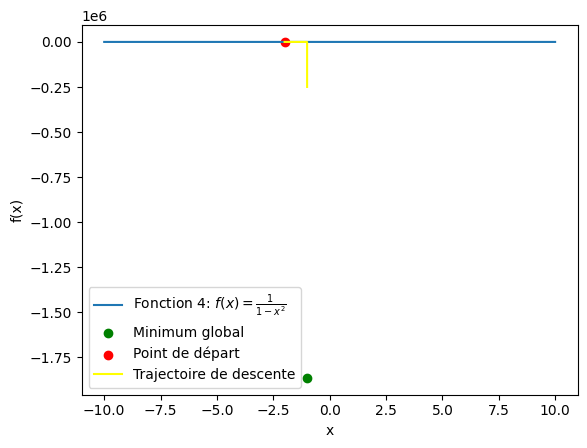

In [ ]:
min_p = x_min[0]
initial=np.asarray(x01)
x_vals = np.linspace(-10, 10, 400)
y_vals = f4(x_vals)

plt.plot(x_vals, y_vals, label="Fonction 4: $f(x) = \\frac{1}{1 - x^2}$")
plt.scatter(min_p, f4(min_p), color='green', label="Minimum global")
plt.scatter(initial, f4(initial), color='red', label="Point de départ")
plt.plot(evolution_X, [f4(x) for x in evolution_X], color='yellow', label="Trajectoire de descente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

### $f5(x,y)=(x-2)^2+(y-3)^2$

Text(0.5, 1.0, 'Fonction 5: $(x - 2)^2 + (y - 3)^2$')

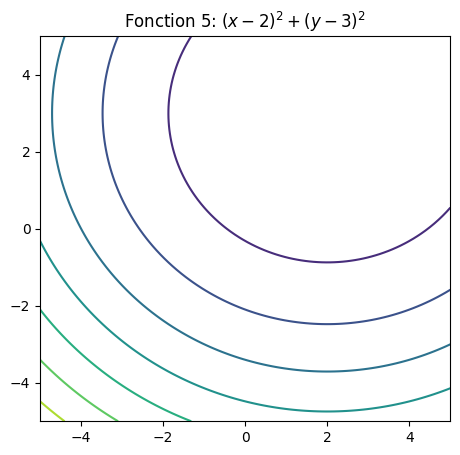

In [ ]:
# Fonction 5: f(x, y) = (x - 2)^2 + (y - 3)^2
def f5(x):
    return (x[0] - 2)**2 + (x[1] - 3)**2
#Le gradient de la fonction f5
def grad5(x):
    df_dx = 2 * (x[0] - 2)
    df_dy = 2 * (x[1] - 3)
    return np.array([df_dx, df_dy])

 # Définir une grille de valeurs pour x et y
x_valeurs = np.linspace(-5, 5, 100)
y_valeurs = np.linspace(-5, 5, 100)
x_2d, y_2d = np.meshgrid(x_valeurs, y_valeurs)

#SI VOUS VOULEZ QUON AFFICHE EN 3D?DECOMMENTEZ CETTE SECTION


# fig1 = plt.figure(figsize=(6, 5))
# ax1 = fig1.add_subplot(111, projection='3d')
# ax1.plot_surface(x_2d, y_2d, f5(x_2d, y_2d), cmap='viridis')
# ax1.set_title('Fonction 5: $(x - 2)^2 + (y - 3)^2$')
# plt.show()

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.contour(x_2d, y_2d, f5([x_2d, y_2d]), cmap='viridis')
plt.title('Fonction 5: $(x - 2)^2 + (y - 3)^2$')


In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f5, grad5, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f5(x_min))
print("Nombre d'itérations :", iterations)

     k          f(x)    s         x         y  ||x-x_old||  ||grad(x)||
33  33  8.938593e-06  0.1  1.997465  2.998415     0.000598     0.005979
34  34  5.720699e-06  0.1  1.997972  2.998732     0.000478     0.004784
35  35  3.661248e-06  0.1  1.998377  2.998986     0.000383     0.003827
36  36  2.343198e-06  0.1  1.998702  2.999189     0.000306     0.003062
37  37  1.499647e-06  0.1  1.998962  2.999351     0.000245     0.002449
38  38  9.597741e-07  0.1  1.999169  2.999481     0.000196     0.001959
39  39  6.142554e-07  0.1  1.999335  2.999585     0.000157     0.001567
40  40  3.931235e-07  0.1  1.999468  2.999668     0.000125     0.001254
41  41  2.515990e-07  0.1  1.999575  2.999734     0.000100     0.001003
42  42  1.610234e-07  0.1  1.999660  2.999787     0.000080     0.000803
43  43  1.030550e-07  0.1  1.999728  2.999830     0.000064     0.000642
44  44  6.595517e-08  0.1  1.999782  2.999864     0.000051     0.000514
45  45  4.221131e-08  0.1  1.999826  2.999891     0.000041     0

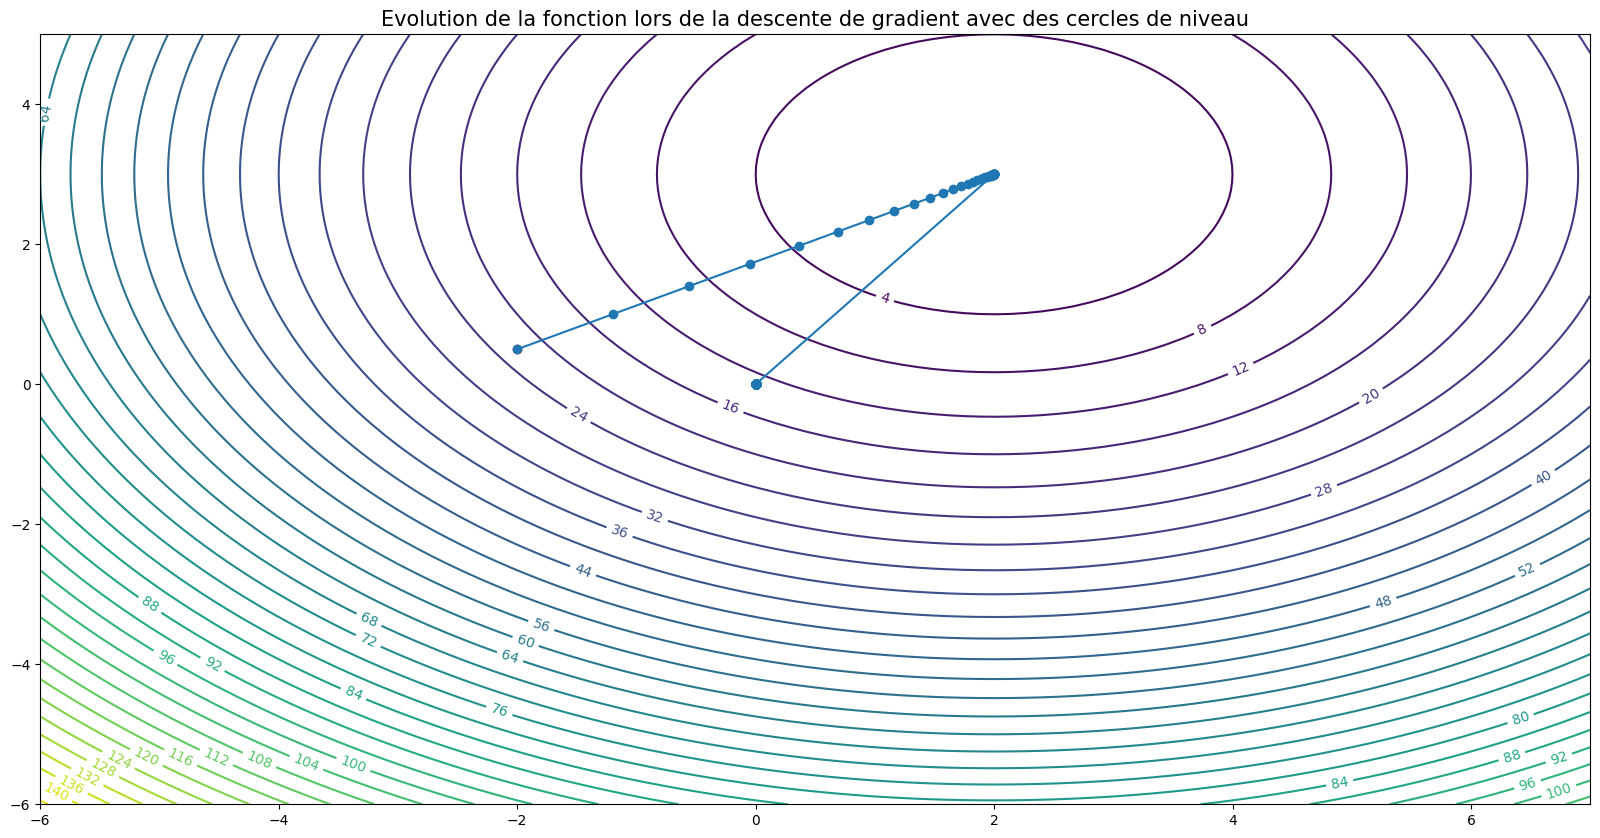

In [ ]:
vg(f5, evolution_X, x_min, x1,  'PasFixe' )

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasNormaliseFixe'
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f5, grad5, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f5(x_min))
print("Nombre d'itérations :", iterations)

       k      f(x)    s         x         y  ||x-x_old||  ||grad(x)||
980  980  0.006891  0.1  2.070392  3.043995          0.1     0.166019
981  981  0.000289  0.1  1.985592  2.990995          0.1     0.033981
982  982  0.006891  0.1  2.070392  3.043995          0.1     0.166019
983  983  0.000289  0.1  1.985592  2.990995          0.1     0.033981
984  984  0.006891  0.1  2.070392  3.043995          0.1     0.166019
985  985  0.000289  0.1  1.985592  2.990995          0.1     0.033981
986  986  0.006891  0.1  2.070392  3.043995          0.1     0.166019
987  987  0.000289  0.1  1.985592  2.990995          0.1     0.033981
988  988  0.006891  0.1  2.070392  3.043995          0.1     0.166019
989  989  0.000289  0.1  1.985592  2.990995          0.1     0.033981
990  990  0.006891  0.1  2.070392  3.043995          0.1     0.166019
991  991  0.000289  0.1  1.985592  2.990995          0.1     0.033981
992  992  0.006891  0.1  2.070392  3.043995          0.1     0.166019
993  993  0.000289  

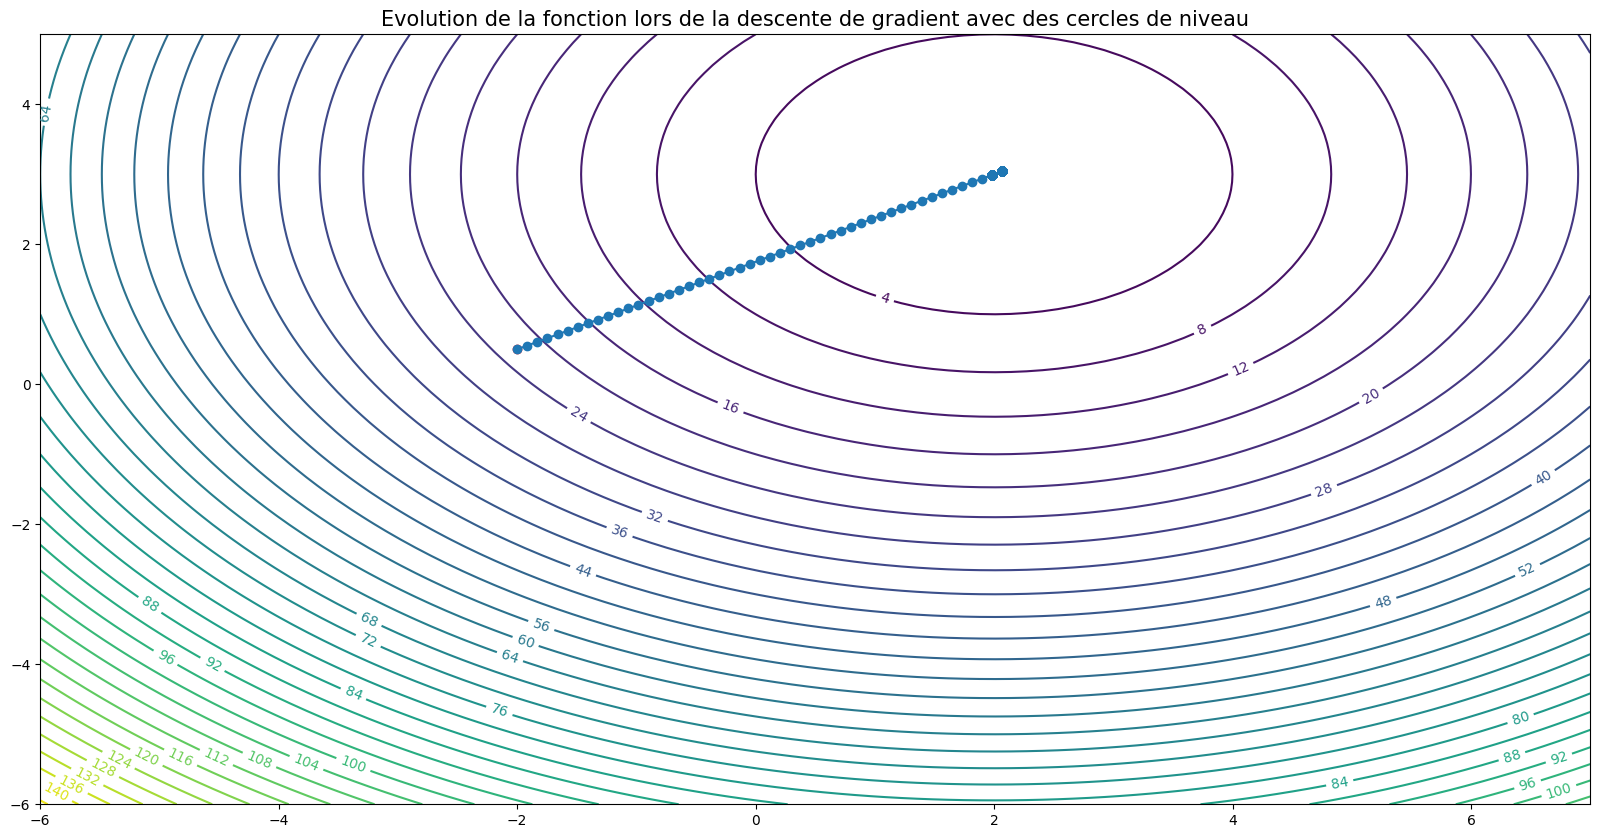

In [ ]:
vg(f5, evolution_X, x_min, x1,  'PasNormaliseFixe' )

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasOptimal'
x_min, evolution_X, iterations = descente_gradient('PasOptimal', f5, grad5, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f5(x_min))
print("Nombre d'itérations :", iterations)

   k   f(x)    s    x    y  ||x-x_old||  ||grad(x)||
0  0  22.25  0.5 -2.0  0.5     4.716991     9.433981
1  1   0.00  1.0  2.0  3.0     0.000000     0.000000
Les paramètres finaux sont:

point error=0.0, grad error=0.0, iteration=2, f(x)=0.0
Minimum atteint à x = [2. 3.]
Valeur minimale de la fonction f(x) = 0.0
Nombre d'itérations : 1


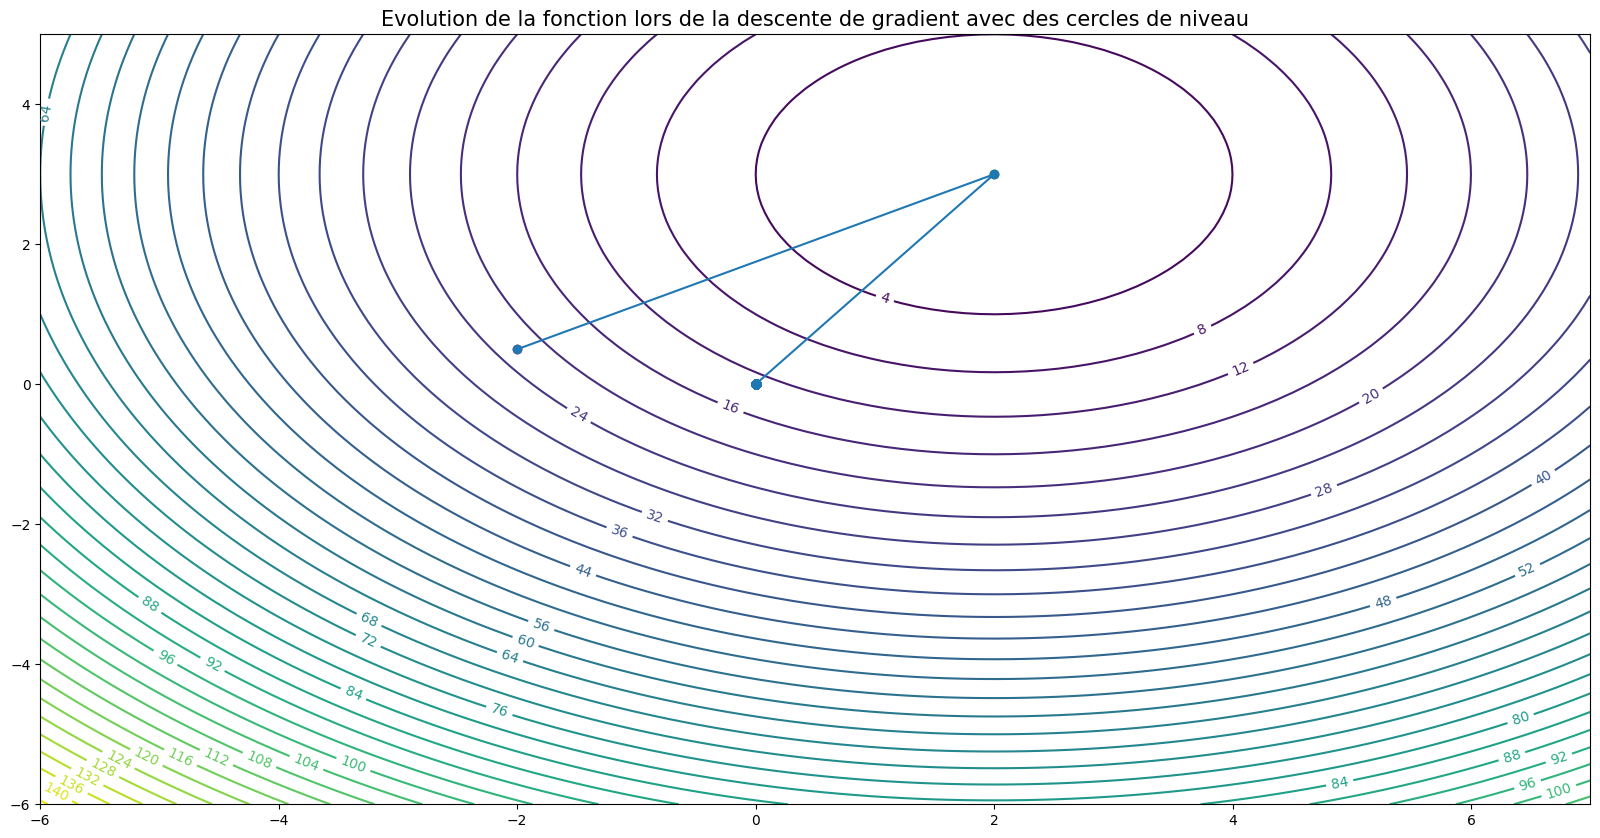

In [ ]:
vg(f5, evolution_X, x_min, x1,  'PasOptimal' )

### $f6(x,y)=x^2+2y^2-xy+5x-4y-5$

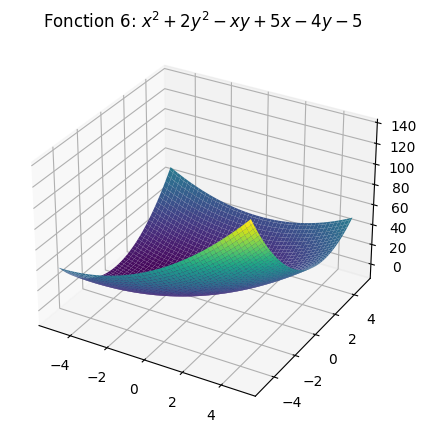

In [ ]:

# Fonction 6: f(x, y) = x^2 + 2y^2 - xy + 5x - 4y - 5
def f6(x):
    return x[0]**2 + 2*x[1]**2 - x[0]*x[1] + 5*x[0] - 4*x[1] - 5
#Le gradient de la fonction f6
def grad6(x):
    df_dx = 2*x[0] - x[1] + 5
    df_dy = 4*x[1] - x[0] - 4
    return np.array([df_dx, df_dy])
fig2 = plt.figure(figsize=(6, 5))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_2d, y_2d, f6([x_2d, y_2d]), cmap='viridis')
ax2.set_title('Fonction 6: $x^2 + 2y^2 - xy + 5x - 4y - 5$')
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f6, grad6, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f6(x_min))
print("Nombre d'itérations :", iterations)

     k       f(x)    s         x         y  ||x-x_old||  ||grad(x)||
30  30 -11.571426  0.1 -2.284199  0.429199     0.000260     0.002600
31  31 -11.571427  0.1 -2.284440  0.429099     0.000219     0.002188
32  32 -11.571428  0.1 -2.284642  0.429016     0.000184     0.001841
33  33 -11.571428  0.1 -2.284812  0.428945     0.000155     0.001549
34  34 -11.571428  0.1 -2.284955  0.428886     0.000130     0.001303
35  35 -11.571428  0.1 -2.285075  0.428836     0.000110     0.001097
36  36 -11.571428  0.1 -2.285177  0.428794     0.000092     0.000923
37  37 -11.571428  0.1 -2.285262  0.428759     0.000078     0.000776
38  38 -11.571428  0.1 -2.285334  0.428729     0.000065     0.000653
39  39 -11.571428  0.1 -2.285394  0.428704     0.000055     0.000550
40  40 -11.571429  0.1 -2.285445  0.428683     0.000046     0.000463
41  41 -11.571429  0.1 -2.285488  0.428665     0.000039     0.000389
42  42 -11.571429  0.1 -2.285524  0.428650     0.000033     0.000327
43  43 -11.571429  0.1 -2.285554  

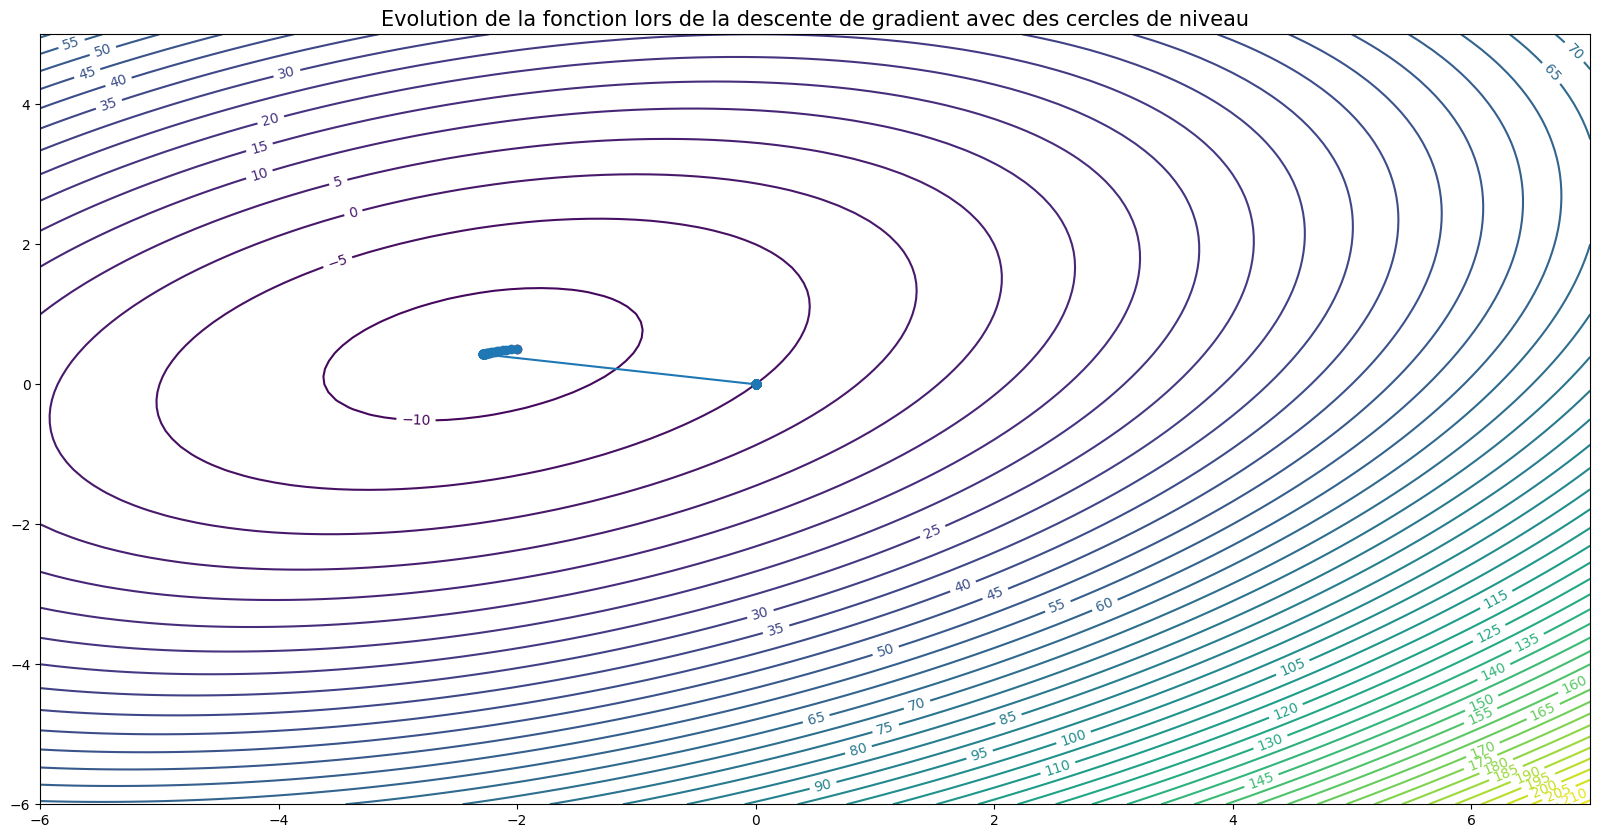

In [ ]:
vg(f6, evolution_X, x_min, x1,  'PasFixe' )

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasNormaliseFixe'
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f6, grad6, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f5(x_min))
print("Nombre d'itérations :", iterations)

       k       f(x)    s         x         y  ||x-x_old||  ||grad(x)||
980  980 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
981  981 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
982  982 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
983  983 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
984  984 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
985  985 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
986  986 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
987  987 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
988  988 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
989  989 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
990  990 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
991  991 -11.569457  0.1 -2.274276  0.400957          0.1     0.131938
992  992 -11.560580  0.1 -2.312545  0.493345          0.1     0.309484
993  9

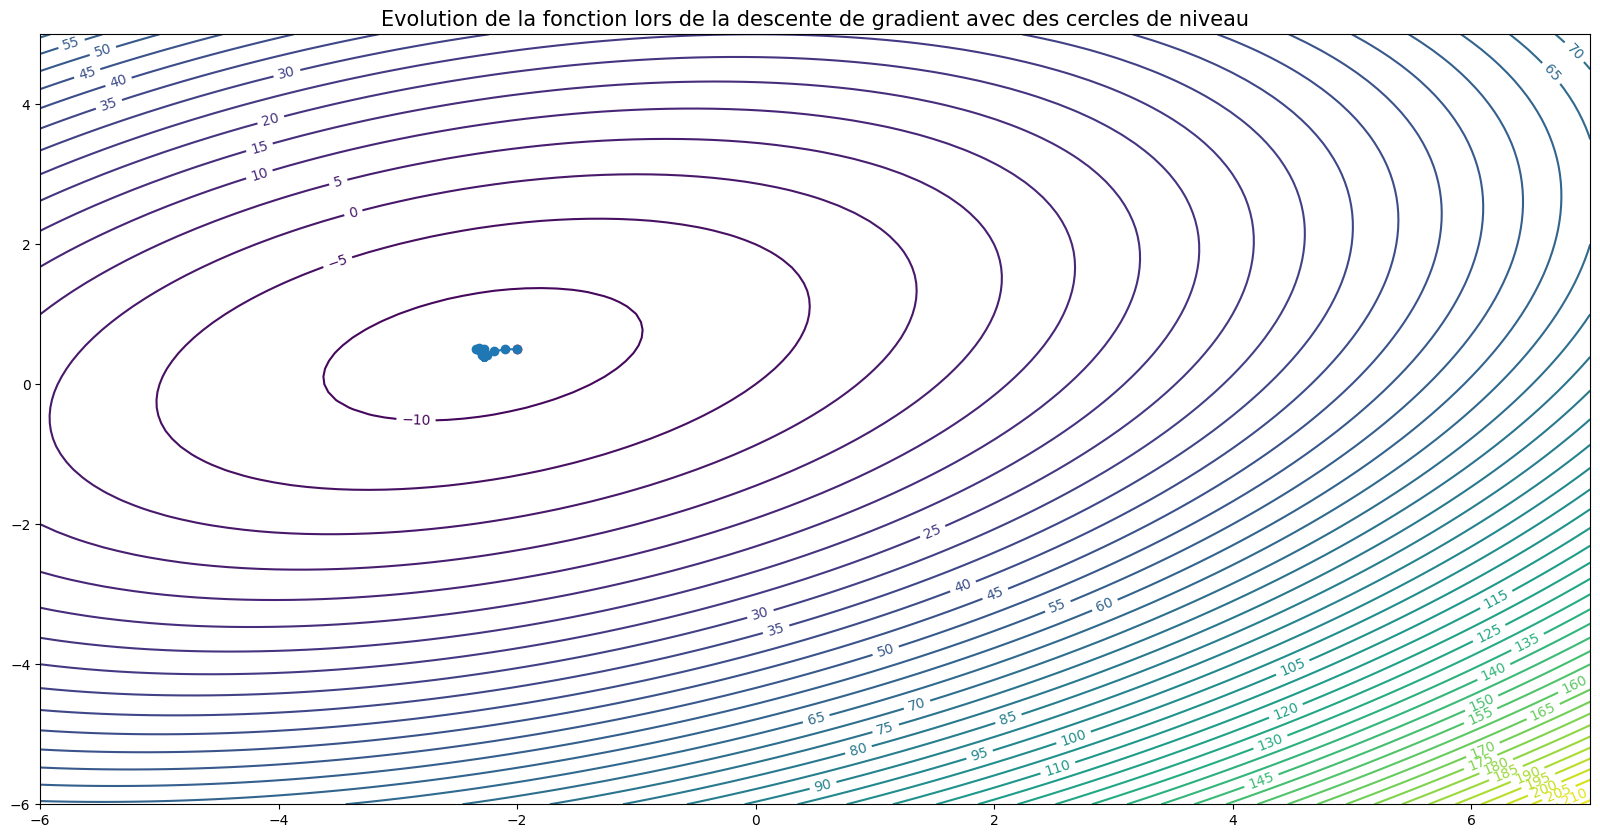

In [ ]:
vg(f6, evolution_X, x_min, x1,  'PasNormaliseFixe' )

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasOptimal'
x_min, evolution_X, iterations = descente_gradient('PasOptimal', f6, grad6, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f5(x_min))
print("Nombre d'itérations :", iterations)

     k       f(x)     s         x         y  ||x-x_old||  ||grad(x)||
2    2 -11.570312  0.50 -2.250000  0.437500     0.031250     0.062500
3    3 -11.571289  0.25 -2.281250  0.437500     0.007812     0.031250
4    4 -11.571411  0.50 -2.281250  0.429688     0.003906     0.007812
5    5 -11.571426  0.25 -2.285156  0.429688     0.000977     0.003906
6    6 -11.571428  0.50 -2.285156  0.428711     0.000488     0.000977
7    7 -11.571429  0.25 -2.285645  0.428711     0.000122     0.000488
8    8 -11.571429  0.50 -2.285645  0.428589     0.000061     0.000122
9    9 -11.571429  0.25 -2.285706  0.428589     0.000015     0.000061
10  10 -11.571429  0.50 -2.285706  0.428574     0.000008     0.000015
Les paramètres finaux sont:

point error=7.62939453125e-06, grad error=1.52587890625e-05, iteration=11, f(x)=-11.571428571420256
Minimum atteint à x = [-2.2857132   0.42857361]
Valeur minimale de la fonction f(x) = 24.979571284085978
Nombre d'itérations : 10


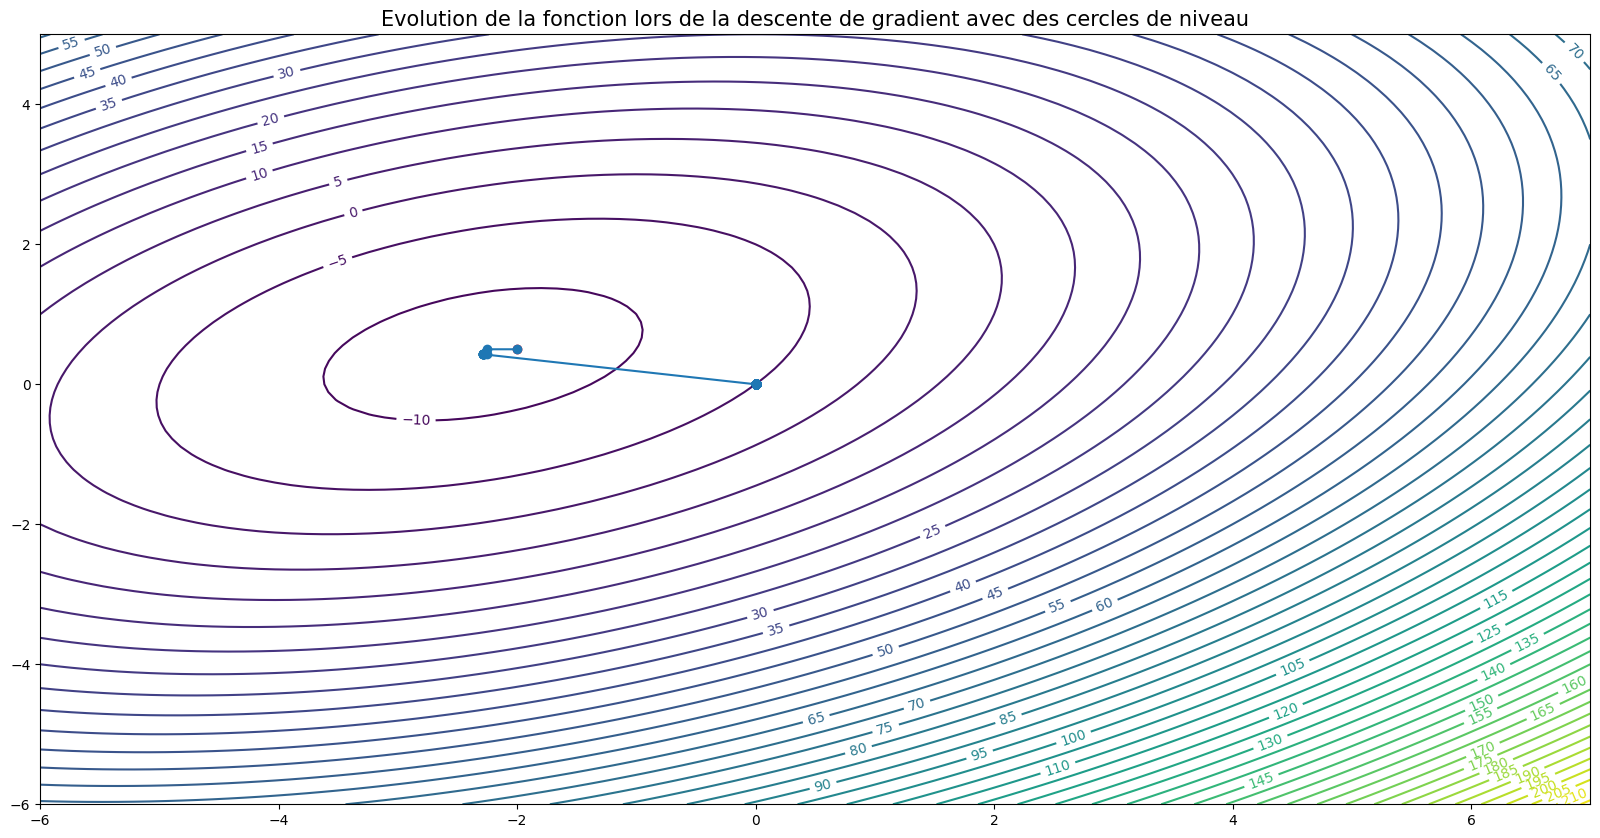

In [ ]:
vg(f6, evolution_X, x_min, x1,  'PasOptimal' )

### $f(x,y)=-0.5+\frac{(x+15)}{30} + \frac{y+15}{40} + 0.5sin( \sqrt{x^2+y^2})$

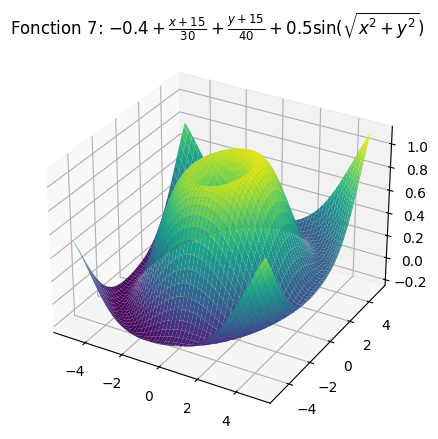

In [ ]:
# Fonction 7: f(x, y) = -0.4 + (x + 15)/30 + (y + 15)/40 + 0.5*sin(sqrt(x^2 + y^2))
def f7(x):
    return -0.4 + (x[0] + 15)/30 + (x[1] + 15)/40 + 0.5*np.sin(np.sqrt(x[0]**2 + x[1]**2))
#Le gradient de la fonction f7
def grad7(x):
    r = np.sqrt(x[0]**2 + x[1]**2)
    df_dx = 1/30 + 0.5*x[0]*np.cos(r)/r
    df_dy = 1/40 + 0.5*x[1]*np.cos(r)/r
    return np.array([df_dx, df_dy])


fig3 = plt.figure(figsize=(6, 5))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x_2d, y_2d, f7([x_2d, y_2d]), cmap='viridis')
ax3.set_title('Fonction 7: $-0.4 + \\frac{x + 15}{30} + \\frac{y + 15}{40} + 0.5\sin(\sqrt{x^2 + y^2})$')
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode PasFixe
x_min, evolution_X, iterations = descente_gradient('PasFixe', f7, grad7, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f6(x_min))
print("Nombre d'itérations :", iterations)

       k      f(x)    s         x         y  ||x-x_old||  ||grad(x)||
980  980 -0.208195  0.1 -4.634664 -1.207471     0.001579     0.015789
981  981 -0.208220  0.1 -4.634276 -1.209001     0.001578     0.015776
982  982 -0.208244  0.1 -4.633888 -1.210531     0.001576     0.015764
983  983 -0.208269  0.1 -4.633500 -1.212058     0.001575     0.015751
984  984 -0.208294  0.1 -4.633112 -1.213585     0.001574     0.015738
985  985 -0.208319  0.1 -4.632723 -1.215110     0.001573     0.015725
986  986 -0.208344  0.1 -4.632334 -1.216634     0.001571     0.015713
987  987 -0.208368  0.1 -4.631945 -1.218156     0.001570     0.015700
988  988 -0.208393  0.1 -4.631556 -1.219677     0.001569     0.015687
989  989 -0.208417  0.1 -4.631166 -1.221197     0.001567     0.015675
990  990 -0.208442  0.1 -4.630777 -1.222715     0.001566     0.015662
991  991 -0.208467  0.1 -4.630387 -1.224232     0.001565     0.015650
992  992 -0.208491  0.1 -4.629997 -1.225747     0.001564     0.015637
993  993 -0.208515  

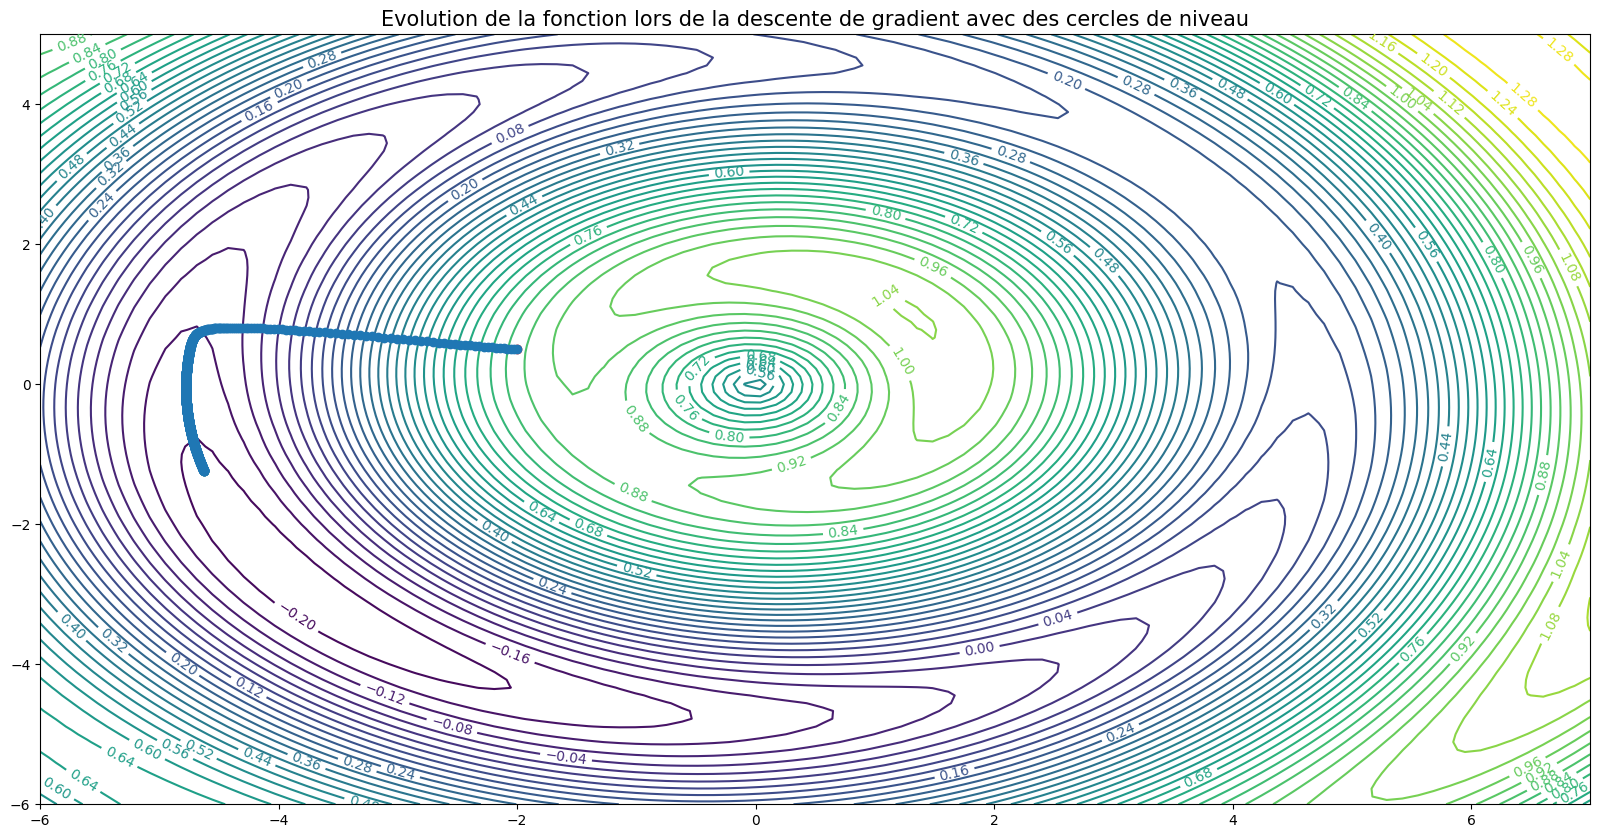

In [ ]:
vg(f7, evolution_X, x_min, x1,  'PasFixe' )

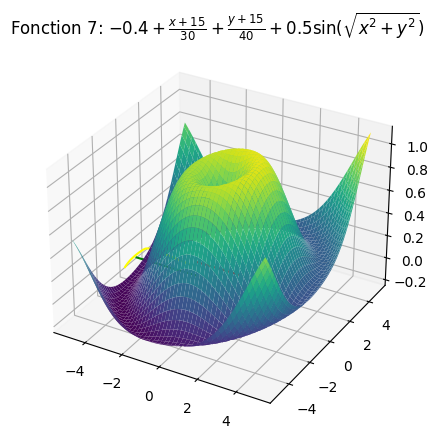

In [ ]:
fig3 = plt.figure(figsize=(6, 5))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x_2d, y_2d, f7([x_2d, y_2d]), cmap='viridis')
ax3.plot(x_min, np.array([f7(x_min),f7(x_min)]), color='green', label="Minimum global")
ax3.plot(np.asarray(x1), np.array([f7(x1),f7(x1)]), color='red', label="Point de départ")
ax3.plot(evolution_X[0],evolution_X[1] , color='yellow', label="Trajectoire de descente")
ax3.set_title('Fonction 7: $-0.4 + \\frac{x + 15}{30} + \\frac{y + 15}{40} + 0.5\sin(\sqrt{x^2 + y^2})$')
plt.show()

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasNormaliseFixe'
x_min, evolution_X, iterations = descente_gradient('PasNormaliseFixe', f7, grad7, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f7(x_min))
print("Nombre d'itérations :", iterations)

       k      f(x)    s        x         y  ||x-x_old||  ||grad(x)||
980  980 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
981  981 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
982  982 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
983  983 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
984  984 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
985  985 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
986  986 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
987  987 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
988  988 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
989  989 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
990  990 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
991  991 -0.222466  0.1 -3.79675 -2.847563          0.1     0.024895
992  992 -0.222462  0.1 -3.87675 -2.907563          0.1     0.024909
993  993 -0.222466  0.1 -3.79675 -

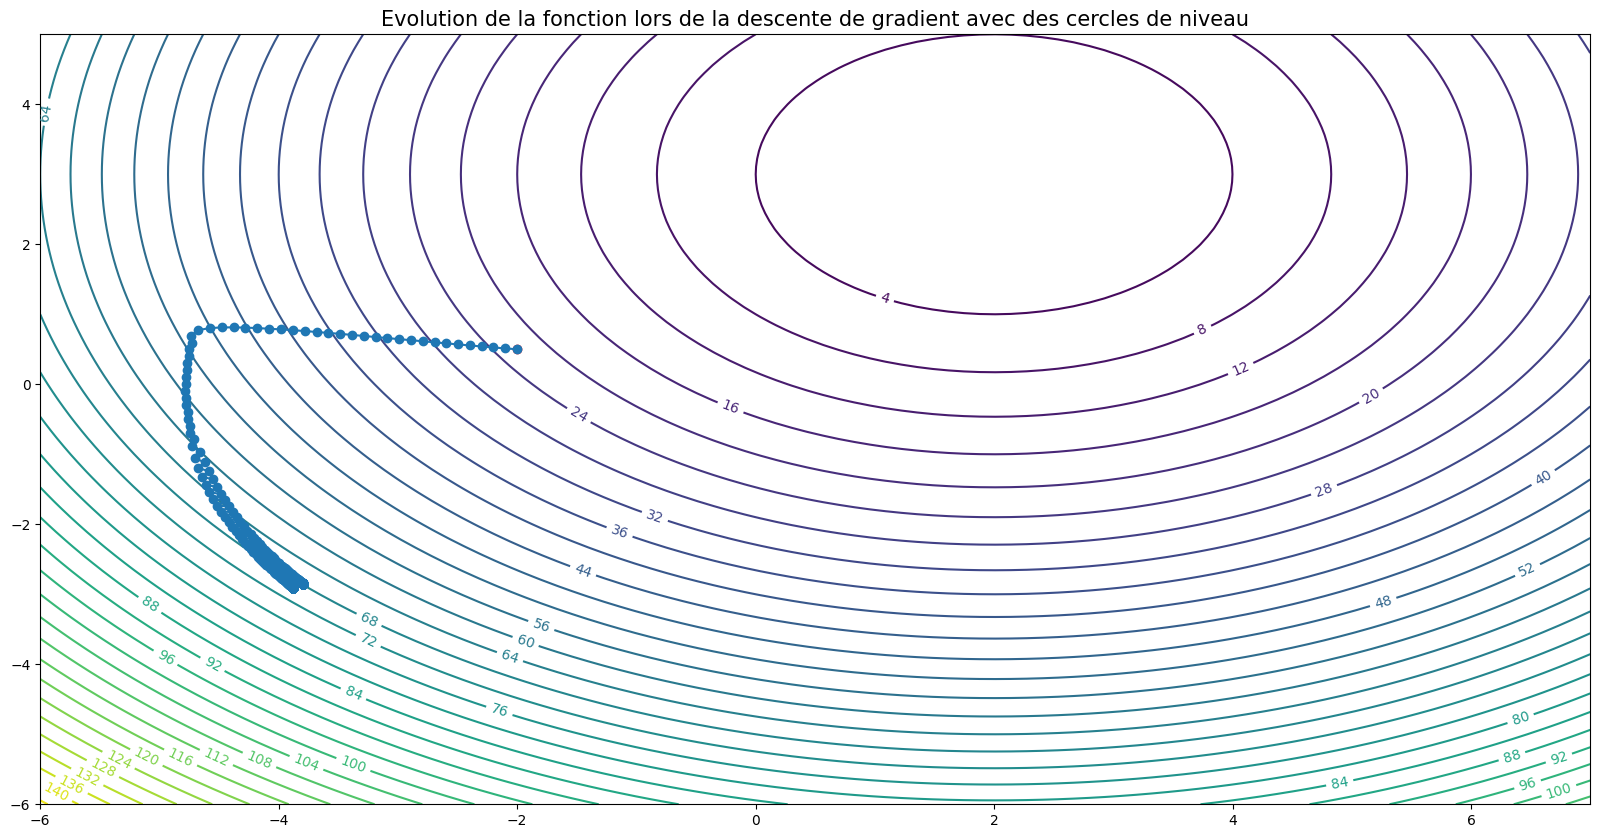

In [ ]:
vg(f5, evolution_X, x_min, x1,  'PasNormaliseFixe' )

In [ ]:
# Appel de la fonction descente_gradient avec la méthode 'PasOptimal'
x_min, evolution_X, iterations = descente_gradient('PasOptimal', f7, grad5, x1 ,pas=0.1)

# Affichage des résultats
print("Minimum atteint à x =", x_min)
print("Valeur minimale de la fonction f(x) =", f7(x_min))
print("Nombre d'itérations :", iterations)

   k      f(x)             s    x    y  ||x-x_old||  ||grad(x)||
0  0  0.861822  3.469447e-18 -2.0  0.5          0.0     9.433981
Les paramètres finaux sont:

point error=0.0, grad error=9.433981132056603, iteration=1, f(x)=0.8618216254708837
Minimum atteint à x = [-2.   0.5]
Valeur minimale de la fonction f(x) = 0.8618216254708837
Nombre d'itérations : 0


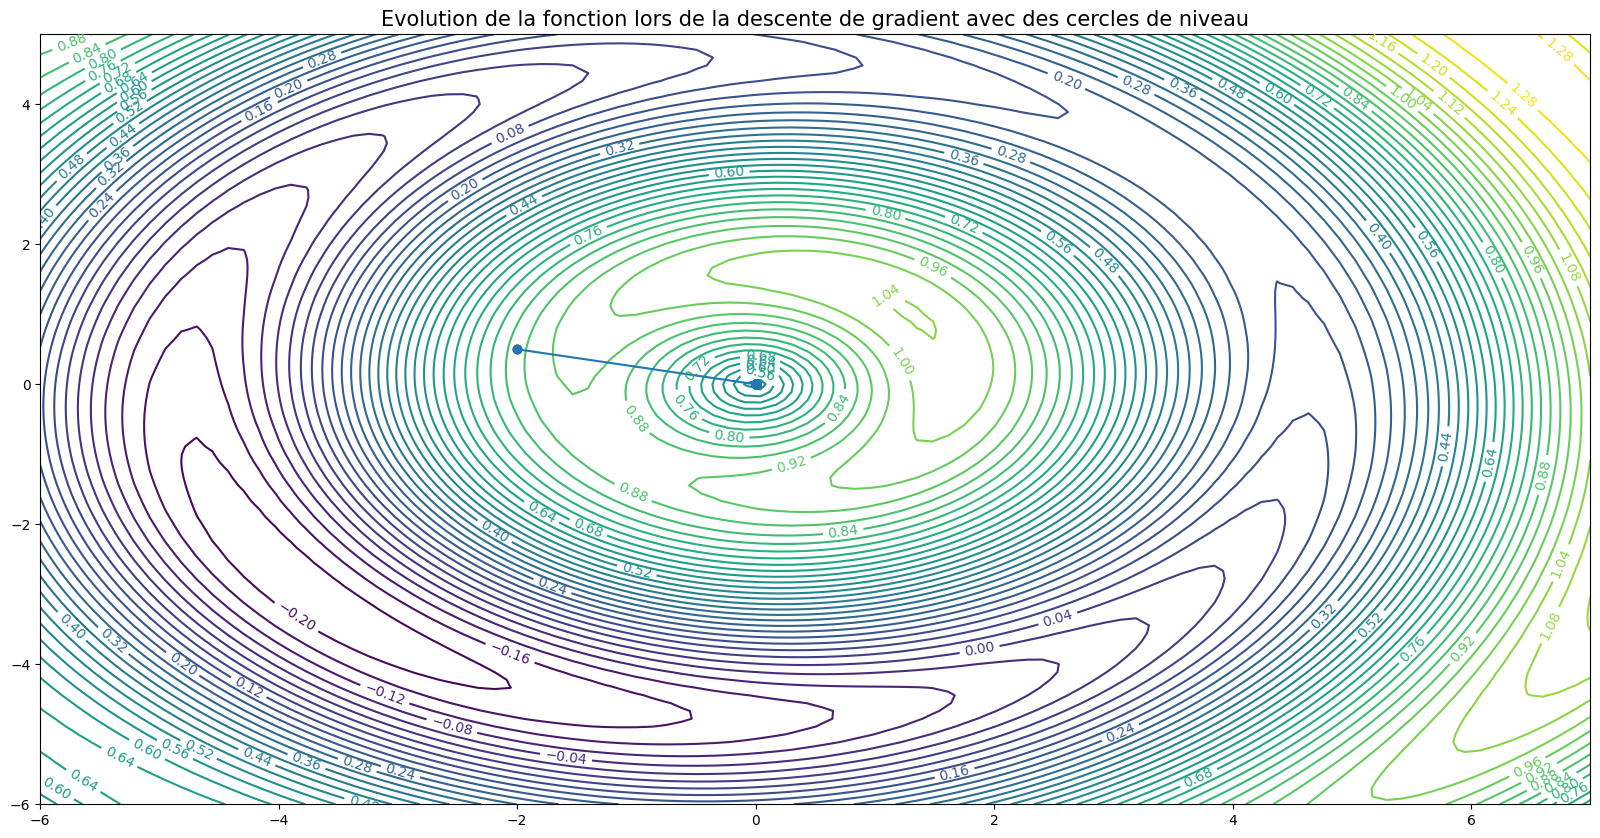

In [ ]:
vg(f7, evolution_X, x_min, x1,  'PasOptimal' )

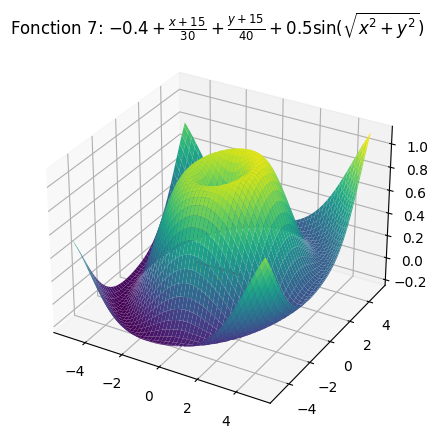

In [ ]:
fig3 = plt.figure(figsize=(6, 5))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x_2d, y_2d, f7([x_2d, y_2d]), cmap='viridis')
ax3.plot(x_min, np.array([f7(x_min),f7(x_min)]), color='green', label="Minimum global")
ax3.plot(np.asarray(x1), np.array([f7(x1),f7(x1)]), color='red', label="Point de départ")
ax3.plot(evolution_X[0],evolution_X[1] , color='yellow', label="Trajectoire de descente")
ax3.set_title('Fonction 7: $-0.4 + \\frac{x + 15}{30} + \\frac{y + 15}{40} + 0.5\sin(\sqrt{x^2 + y^2})$')
plt.show()